In [1]:
# Importing pandas library
import pandas as pd

#importing pandas_profiling to help create a dataframe report on our dataset
import pandas_profiling


In [2]:
#Importing the King County data into pandas and running the head to get an over view of the dataset,
#followed by the .info to see the number of rows, number of null values and dtypes in the dataframe

df = pd.read_csv('kc_house_data.csv')

In [3]:
df.head()

id        date     price  bedrooms  bathrooms  sqft_living  \
0  7129300520  10/13/2014  221900.0         3       1.00         1180   
1  6414100192   12/9/2014  538000.0         3       2.25         2570   
2  5631500400   2/25/2015  180000.0         2       1.00          770   
3  2487200875   12/9/2014  604000.0         4       3.00         1960   
4  1954400510   2/18/2015  510000.0         3       2.00         1680   

   sqft_lot  floors  waterfront  view  ...  grade  sqft_above  sqft_basement  \
0      5650     1.0         NaN   0.0  ...      7        1180            0.0   
1      7242     2.0         0.0   0.0  ...      7        2170          400.0   
2     10000     1.0         0.0   0.0  ...      6         770            0.0   
3      5000     1.0         0.0   0.0  ...      7        1050          910.0   
4      8080     1.0         0.0   0.0  ...      8        1680            0.0   

  yr_built  yr_renovated  zipcode      lat     long  sqft_living15  sqft_lot15  
0     1955           0.0    98178  47.5112 -122.257           1340        5650  
1     1951        1991.0    98125  47.7210 -122.319           1690        7639  
2     1933           NaN    98028  47.7379 -122.233           2720        8062  
3     1965           0.0    98136  47.5208 -122.393           1360        5000  
4     1987           0.0    98074  47.6168 -122.045           1800        7503  

[5 rows x 21 columns]

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
id               21597 non-null int64
date             21597 non-null object
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       19221 non-null float64
view             21534 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null object
yr_built         21597 non-null int64
yr_renovated     17755 non-null float64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: float64(8), int64(11), object(2)
memory usage: 3.5+ MB


In [5]:
# creating a profile report on the dataset with an HTML output. We do this purely for the purposes of speeding up our
# EDA process by seeing the breakdown of each of the variables of the dataframe, including missing variables.
profile = df.profile_report(title='KC Housing Report')
profile.to_file(output_file="KCHousing.html")

In [132]:
#A quick check of the value counts to see if there are any major inconsistancies

for col in df.columns:
    print("\n",df[col].value_counts().head(),"\n\n")


 795000620     3
7856400300    2
1954420170    2
1036400200    2
2023049218    2
Name: id, dtype: int64 



 6/23/2014    142
6/26/2014    131
6/25/2014    130
7/8/2014     127
4/27/2015    126
Name: date, dtype: int64 



 13.017003    172
12.765688    172
13.217674    158
13.122363    152
12.959844    150
Name: price, dtype: int64 



 3    9822
4    6881
2    2760
5    1601
6     272
Name: bedrooms, dtype: int64 



 2.50    5375
1.00    3851
1.75    3046
2.25    2047
2.00    1930
Name: bathrooms, dtype: int64 



 7.170120    138
7.244228    135
7.272398    133
6.917706    129
7.414573    129
Name: sqft_living, dtype: int64 



 5000    358
6000    289
4000    251
7200    220
4800    119
Name: sqft_lot, dtype: int64 



 1.0    10672
2.0     8232
1.5     1910
3.0      611
2.5      161
Name: floors, dtype: int64 



 0.0    21447
1.0      146
Name: waterfront, dtype: int64 



 3    14018
4     5676
5     1700
2      170
1       29
Name: condition, dtype: int64 



 7     8973
8   

AttributeError: 'GeometryArray' object has no attribute 'value_counts'

In [7]:
#Retrieving the total sum of null values in each column

df.isnull().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

# EDA

## Initial cleaning

In [8]:
df.bedrooms.value_counts()

3     9824
4     6882
2     2760
5     1601
6      272
1      196
7       38
8       13
9        6
10       3
11       1
33       1
Name: bedrooms, dtype: int64

In [9]:
df = df[df.bedrooms != 33]

In [10]:
df.bedrooms.value_counts()

3     9824
4     6882
2     2760
5     1601
6      272
1      196
7       38
8       13
9        6
10       3
11       1
Name: bedrooms, dtype: int64

### Views

With our initial look at the data, we noticed that 89.9% of the properties listed had 0 views. It is highly unlikely that that 19422 properties have been sold without a single view. Therefore it is logical to assume that this column is unreliable and can therefore be removed.

In [11]:
df['view'].value_counts()

0.0    19421
2.0      957
3.0      508
1.0      330
4.0      317
Name: view, dtype: int64

In [12]:
df = df.drop('view', axis =1)

In [13]:
#a quick check to confirm that the column has successfully been removed from the dataframe. 
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21596 entries, 0 to 21596
Data columns (total 20 columns):
id               21596 non-null int64
date             21596 non-null object
price            21596 non-null float64
bedrooms         21596 non-null int64
bathrooms        21596 non-null float64
sqft_living      21596 non-null int64
sqft_lot         21596 non-null int64
floors           21596 non-null float64
waterfront       19220 non-null float64
condition        21596 non-null int64
grade            21596 non-null int64
sqft_above       21596 non-null int64
sqft_basement    21596 non-null object
yr_built         21596 non-null int64
yr_renovated     17754 non-null float64
zipcode          21596 non-null int64
lat              21596 non-null float64
long             21596 non-null float64
sqft_living15    21596 non-null int64
sqft_lot15       21596 non-null int64
dtypes: float64(7), int64(11), object(2)
memory usage: 3.5+ MB


In [14]:
df.isnull().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

## Waterfront

Based on our mapping of the properties, using geopandas, we noticed that there are clearly more than 146 properties that have a view of the waterfront let alone the ones that are on the waterfront. Furthermore, the 2376 missing will still not account for the actual number of properties with views of the waterfront. 

We therefore consider this column as unreliable and are therefore dropping it

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21596 entries, 0 to 21596
Data columns (total 20 columns):
id               21596 non-null int64
date             21596 non-null object
price            21596 non-null float64
bedrooms         21596 non-null int64
bathrooms        21596 non-null float64
sqft_living      21596 non-null int64
sqft_lot         21596 non-null int64
floors           21596 non-null float64
waterfront       19220 non-null float64
condition        21596 non-null int64
grade            21596 non-null int64
sqft_above       21596 non-null int64
sqft_basement    21596 non-null object
yr_built         21596 non-null int64
yr_renovated     17754 non-null float64
zipcode          21596 non-null int64
lat              21596 non-null float64
long             21596 non-null float64
sqft_living15    21596 non-null int64
sqft_lot15       21596 non-null int64
dtypes: float64(7), int64(11), object(2)
memory usage: 3.5+ MB


In [16]:
# importing geopandas, descartes and matplotlib inorder to map out all the properties on a map of seattle

import geopandas as gpd
import descartes
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [17]:
#importing shapely inorder to incorporate the longitude and the latitude with geopandas

from shapely.geometry import Point, Polygon

In [18]:
#creating a shapley point based on a tuple of the long and lat
geometry = [Point(xy) for xy in zip(df['long'], df['lat'])]
geometry[:5]

In [19]:
# intiialising the coordinate reference system to allow geopandas to plot the long and lats of the different 
#properties

crs = {'init' : 'epsg:4326'}

In [20]:
#importing the shape file of the king county map

street_map = gpd.read_file('./tl_2017_53033_roads/tl_2017_53033_roads.shp')

In [21]:
# converting our dataframe into a geopandas dataframe

geo_df = gpd.GeoDataFrame(df, crs = crs, geometry = geometry)
geo_df.head()

id        date     price  bedrooms  bathrooms  sqft_living  \
0  7129300520  10/13/2014  221900.0         3       1.00         1180   
1  6414100192   12/9/2014  538000.0         3       2.25         2570   
2  5631500400   2/25/2015  180000.0         2       1.00          770   
3  2487200875   12/9/2014  604000.0         4       3.00         1960   
4  1954400510   2/18/2015  510000.0         3       2.00         1680   

   sqft_lot  floors  waterfront  condition  ...  sqft_above  sqft_basement  \
0      5650     1.0         NaN          3  ...        1180            0.0   
1      7242     2.0         0.0          3  ...        2170          400.0   
2     10000     1.0         0.0          3  ...         770            0.0   
3      5000     1.0         0.0          5  ...        1050          910.0   
4      8080     1.0         0.0          3  ...        1680            0.0   

  yr_built  yr_renovated  zipcode      lat     long  sqft_living15  \
0     1955           0.0    98178  47.5112 -122.257           1340   
1     1951        1991.0    98125  47.7210 -122.319           1690   
2     1933           NaN    98028  47.7379 -122.233           2720   
3     1965           0.0    98136  47.5208 -122.393           1360   
4     1987           0.0    98074  47.6168 -122.045           1800   

   sqft_lot15                     geometry  
0        5650  POINT (-122.25700 47.51120)  
1        7639  POINT (-122.31900 47.72100)  
2        8062  POINT (-122.23300 47.73790)  
3        5000  POINT (-122.39300 47.52080)  
4        7503  POINT (-122.04500 47.61680)  

[5 rows x 21 columns]

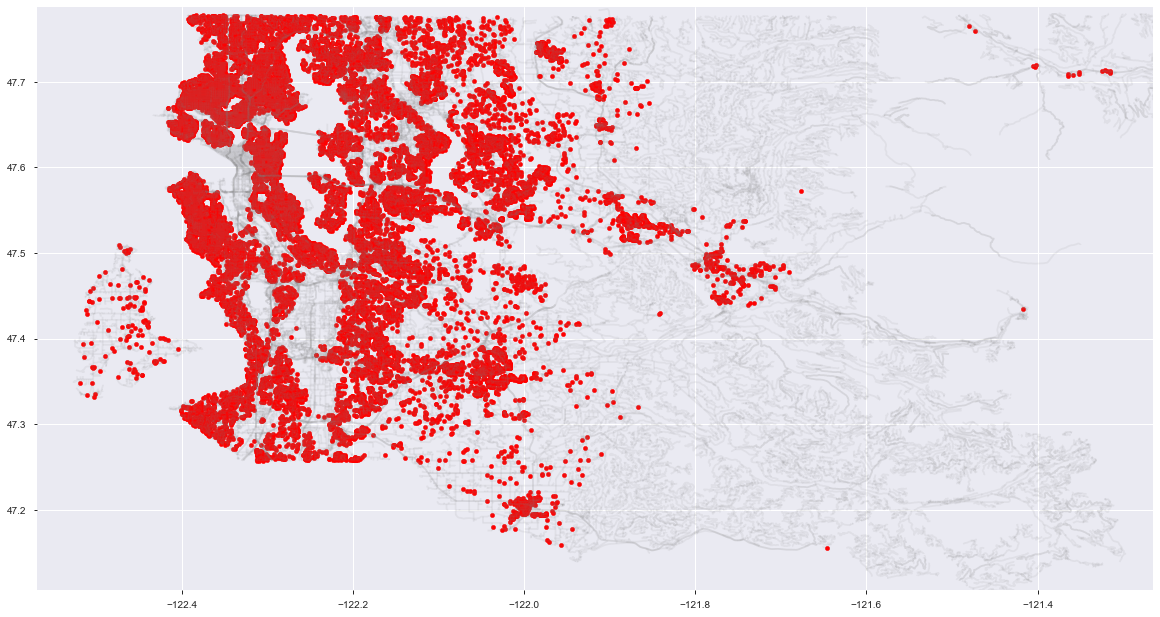

In [22]:
#maping the property listings on the king county map.
#we have limitid the map size as none of the properties hit the edges of the map
fig, ax = plt.subplots(figsize = (20,20))
street_map.plot(ax =ax, alpha = 0.1, color = "grey")
geo_df.plot(ax=ax, markersize = 20, color='red')
minx, miny, maxx, maxy = geo_df.total_bounds
ax.set_xlim(minx-0.05, maxx+0.05)
ax.set_ylim(miny-0.05, maxy+0.01)
plt.savefig('KC_properties.png')

In [23]:
df.waterfront.fillna(0, inplace=True)

In [24]:
#a quick check to confirm that the null values have been filled 
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21596 entries, 0 to 21596
Data columns (total 21 columns):
id               21596 non-null int64
date             21596 non-null object
price            21596 non-null float64
bedrooms         21596 non-null int64
bathrooms        21596 non-null float64
sqft_living      21596 non-null int64
sqft_lot         21596 non-null int64
floors           21596 non-null float64
waterfront       21596 non-null float64
condition        21596 non-null int64
grade            21596 non-null int64
sqft_above       21596 non-null int64
sqft_basement    21596 non-null object
yr_built         21596 non-null int64
yr_renovated     17754 non-null float64
zipcode          21596 non-null int64
lat              21596 non-null float64
long             21596 non-null float64
sqft_living15    21596 non-null int64
sqft_lot15       21596 non-null int64
geometry         21596 non-null geometry
dtypes: float64(7), geometry(1), int64(11), object(2)
memory usage: 3.6+ M

## Year Renovated

During our analysis of the data we noticed that 17.8% of the year renovated data are null values. After furher investigation we found the majority of the properties, 78.8% have not been renovated. Therefore it is relatively safe to assume that these properties have also not been renovated. 

We have therefore replace the null values with the mode.

In [25]:
df['yr_renovated'].value_counts().head()

0.0       17010
2014.0       73
2003.0       31
2013.0       31
2007.0       30
Name: yr_renovated, dtype: int64

In [26]:
#getting and replacing the null values with the mode.

renovated_mode = float(df.yr_renovated.mode())
df['yr_renovated'].fillna(renovated_mode, inplace =True)

In [27]:
#Checking to see if the null values in yr_renovated have been filled
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21596 entries, 0 to 21596
Data columns (total 21 columns):
id               21596 non-null int64
date             21596 non-null object
price            21596 non-null float64
bedrooms         21596 non-null int64
bathrooms        21596 non-null float64
sqft_living      21596 non-null int64
sqft_lot         21596 non-null int64
floors           21596 non-null float64
waterfront       21596 non-null float64
condition        21596 non-null int64
grade            21596 non-null int64
sqft_above       21596 non-null int64
sqft_basement    21596 non-null object
yr_built         21596 non-null int64
yr_renovated     21596 non-null float64
zipcode          21596 non-null int64
lat              21596 non-null float64
long             21596 non-null float64
sqft_living15    21596 non-null int64
sqft_lot15       21596 non-null int64
geometry         21596 non-null geometry
dtypes: float64(7), geometry(1), int64(11), object(2)
memory usage: 3.6+ M

## sqft_basement

A quick look at the df.info() shows that the sqft_basement is an object, after further investigation we noticed that the problem was 454 listing had a '?' as the value. In order to correct this we had to convert the column to a numeric column. 

In order to replace the the missing values we created a new column subtracting the the sqft_living from the sqft_above. We then created a boolean column to verify our calculations.

In [28]:
# Because sqft_basememnt is listed as an object, we need to analyze the data and see if there are any values 
# that are not ints or floats

#Clearly in this case there is a '?' as a value which is forcing the column to be an Object.

df.sqft_basement.value_counts().head()

0.0      12826
?          454
600.0      217
500.0      209
700.0      208
Name: sqft_basement, dtype: int64

In [29]:
#Converting to_numeric
df['sqft_basement'] = pd.to_numeric(df['sqft_basement'], errors = 'coerce')

In [30]:
#As we can see the '?' values have now become nulll values.
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21596 entries, 0 to 21596
Data columns (total 21 columns):
id               21596 non-null int64
date             21596 non-null object
price            21596 non-null float64
bedrooms         21596 non-null int64
bathrooms        21596 non-null float64
sqft_living      21596 non-null int64
sqft_lot         21596 non-null int64
floors           21596 non-null float64
waterfront       21596 non-null float64
condition        21596 non-null int64
grade            21596 non-null int64
sqft_above       21596 non-null int64
sqft_basement    21142 non-null float64
yr_built         21596 non-null int64
yr_renovated     21596 non-null float64
zipcode          21596 non-null int64
lat              21596 non-null float64
long             21596 non-null float64
sqft_living15    21596 non-null int64
sqft_lot15       21596 non-null int64
geometry         21596 non-null geometry
dtypes: float64(8), geometry(1), int64(11), object(1)
memory usage: 3.6+ 

In [31]:
df['sqft_basement2'] = df['sqft_living'] - df['sqft_above']

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21596 entries, 0 to 21596
Data columns (total 22 columns):
id                21596 non-null int64
date              21596 non-null object
price             21596 non-null float64
bedrooms          21596 non-null int64
bathrooms         21596 non-null float64
sqft_living       21596 non-null int64
sqft_lot          21596 non-null int64
floors            21596 non-null float64
waterfront        21596 non-null float64
condition         21596 non-null int64
grade             21596 non-null int64
sqft_above        21596 non-null int64
sqft_basement     21142 non-null float64
yr_built          21596 non-null int64
yr_renovated      21596 non-null float64
zipcode           21596 non-null int64
lat               21596 non-null float64
long              21596 non-null float64
sqft_living15     21596 non-null int64
sqft_lot15        21596 non-null int64
geometry          21596 non-null geometry
sqft_basement2    21596 non-null int64
dtypes: float

In [33]:
df.sqft_basement.value_counts().head()

0.0      12826
600.0      217
500.0      209
700.0      208
800.0      201
Name: sqft_basement, dtype: int64

In [34]:
#Creating a boolean coolum to check if the values are eaqual.

df['basement_bool'] =  df['sqft_basement'].eq(df['sqft_basement2'])

In [35]:
# We've chosen to look at the top 20 results so as to check if the basement_bool column has been set up properly
df.head(20)

id        date      price  bedrooms  bathrooms  sqft_living  \
0   7129300520  10/13/2014   221900.0         3       1.00         1180   
1   6414100192   12/9/2014   538000.0         3       2.25         2570   
2   5631500400   2/25/2015   180000.0         2       1.00          770   
3   2487200875   12/9/2014   604000.0         4       3.00         1960   
4   1954400510   2/18/2015   510000.0         3       2.00         1680   
5   7237550310   5/12/2014  1230000.0         4       4.50         5420   
6   1321400060   6/27/2014   257500.0         3       2.25         1715   
7   2008000270   1/15/2015   291850.0         3       1.50         1060   
8   2414600126   4/15/2015   229500.0         3       1.00         1780   
9   3793500160   3/12/2015   323000.0         3       2.50         1890   
10  1736800520    4/3/2015   662500.0         3       2.50         3560   
11  9212900260   5/27/2014   468000.0         2       1.00         1160   
12   114101516   5/28/2014   310000.0         3       1.00         1430   
13  6054650070   10/7/2014   400000.0         3       1.75         1370   
14  1175000570   3/12/2015   530000.0         5       2.00         1810   
15  9297300055   1/24/2015   650000.0         4       3.00         2950   
16  1875500060   7/31/2014   395000.0         3       2.00         1890   
17  6865200140   5/29/2014   485000.0         4       1.00         1600   
18    16000397   12/5/2014   189000.0         2       1.00         1200   
19  7983200060   4/24/2015   230000.0         3       1.00         1250   

    sqft_lot  floors  waterfront  condition  ...  yr_built  yr_renovated  \
0       5650     1.0         0.0          3  ...      1955           0.0   
1       7242     2.0         0.0          3  ...      1951        1991.0   
2      10000     1.0         0.0          3  ...      1933           0.0   
3       5000     1.0         0.0          5  ...      1965           0.0   
4       8080     1.0         0.0          3  ...      1987           0.0   
5     101930     1.0         0.0          3  ...      2001           0.0   
6       6819     2.0         0.0          3  ...      1995           0.0   
7       9711     1.0         0.0          3  ...      1963           0.0   
8       7470     1.0         0.0          3  ...      1960           0.0   
9       6560     2.0         0.0          3  ...      2003           0.0   
10      9796     1.0         0.0          3  ...      1965           0.0   
11      6000     1.0         0.0          4  ...      1942           0.0   
12     19901     1.5         0.0          4  ...      1927           0.0   
13      9680     1.0         0.0          4  ...      1977           0.0   
14      4850     1.5         0.0          3  ...      1900           0.0   
15      5000     2.0         0.0          3  ...      1979           0.0   
16     14040     2.0         0.0          3  ...      1994           0.0   
17      4300     1.5         0.0          4  ...      1916           0.0   
18      9850     1.0         0.0          4  ...      1921           0.0   
19      9774     1.0         0.0          4  ...      1969           0.0   

    zipcode      lat     long  sqft_living15  sqft_lot15  \
0     98178  47.5112 -122.257           1340        5650   
1     98125  47.7210 -122.319           1690        7639   
2     98028  47.7379 -122.233           2720        8062   
3     98136  47.5208 -122.393           1360        5000   
4     98074  47.6168 -122.045           1800        7503   
5     98053  47.6561 -122.005           4760      101930   
6     98003  47.3097 -122.327           2238        6819   
7     98198  47.4095 -122.315           1650        9711   
8     98146  47.5123 -122.337           1780        8113   
9     98038  47.3684 -122.031           2390        7570   
10    98007  47.6007 -122.145           2210        8925   
11    98115  47.6900 -122.292           1330        6000   
12    98028  47.7558 -122.229           1780       12697   

In [36]:
#checking the number of false values
false_basement = df[df['basement_bool']==False]

In [37]:
#As we can through the boolean column we have correctly identified and corrected the mistakes in the sqft_basement. 
#As we now have the correct data in sqft_basement2 we can drop sqft_basement 
false_basement.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 454 entries, 6 to 21581
Data columns (total 23 columns):
id                454 non-null int64
date              454 non-null object
price             454 non-null float64
bedrooms          454 non-null int64
bathrooms         454 non-null float64
sqft_living       454 non-null int64
sqft_lot          454 non-null int64
floors            454 non-null float64
waterfront        454 non-null float64
condition         454 non-null int64
grade             454 non-null int64
sqft_above        454 non-null int64
sqft_basement     0 non-null float64
yr_built          454 non-null int64
yr_renovated      454 non-null float64
zipcode           454 non-null int64
lat               454 non-null float64
long              454 non-null float64
sqft_living15     454 non-null int64
sqft_lot15        454 non-null int64
geometry          454 non-null geometry
sqft_basement2    454 non-null int64
basement_bool     454 non-null bool
dtypes: bool(1), float64(

In [38]:
df = df.drop('sqft_basement', axis =1)

In [39]:

df.isnull().sum()

id                0
date              0
price             0
bedrooms          0
bathrooms         0
sqft_living       0
sqft_lot          0
floors            0
waterfront        0
condition         0
grade             0
sqft_above        0
yr_built          0
yr_renovated      0
zipcode           0
lat               0
long              0
sqft_living15     0
sqft_lot15        0
geometry          0
sqft_basement2    0
basement_bool     0
dtype: int64

In [40]:
# creating a basement column made of 1s & 0s based on whether they have a basement for future modeling purposes.

df['basement'] = df['sqft_basement2'].clip(upper = 1)
df.basement.value_counts()

0    13110
1     8486
Name: basement, dtype: int64

## Finding Duplicate 'id's

Checking to see if there are any duplicates that have significant value. if they dont have any significant value then we can remove them. 

After analysing the data for duplicates,we initially found found 177 duplicates of those we decide to remove 3 properties as they were bought and sold for the same price thus having no significant impact on our overall data.

In [41]:
# Checking for duplicates in the id column
dups = df[df.duplicated(subset=['id','price'], keep = 'last')]

In [42]:
dups.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3 entries, 3946 to 20037
Data columns (total 23 columns):
id                3 non-null int64
date              3 non-null object
price             3 non-null float64
bedrooms          3 non-null int64
bathrooms         3 non-null float64
sqft_living       3 non-null int64
sqft_lot          3 non-null int64
floors            3 non-null float64
waterfront        3 non-null float64
condition         3 non-null int64
grade             3 non-null int64
sqft_above        3 non-null int64
yr_built          3 non-null int64
yr_renovated      3 non-null float64
zipcode           3 non-null int64
lat               3 non-null float64
long              3 non-null float64
sqft_living15     3 non-null int64
sqft_lot15        3 non-null int64
geometry          3 non-null geometry
sqft_basement2    3 non-null int64
basement_bool     3 non-null bool
basement          3 non-null int64
dtypes: bool(1), float64(7), geometry(1), int64(13), object(1)
memory 

In [43]:
dups

id       date     price  bedrooms  bathrooms  sqft_living  \
3946   1825069031  8/14/2014  550000.0         4       1.75         2410   
14968  6308000010  12/8/2014  585000.0         3       2.50         2290   
20037  8648900110   5/5/2014  555000.0         3       2.50         1940   

       sqft_lot  floors  waterfront  condition  ...  yr_renovated  zipcode  \
3946       8447     2.0         0.0          4  ...        1980.0    98074   
14968      5089     2.0         0.0          3  ...           0.0    98006   
20037      3211     2.0         0.0          3  ...           0.0    98027   

           lat     long  sqft_living15  sqft_lot15  \
3946   47.6499 -122.088           2520       14789   
14968  47.5443 -122.172           2290        7984   
20037  47.5644 -122.093           1880        3078   

                          geometry  sqft_basement2  basement_bool basement  
3946   POINT (-122.08800 47.64990)             350           True        1  
14968  POINT (-122.17200 47.54430)               0           True        0  
20037  POINT (-122.09300 47.56440)               0           True        0  

[3 rows x 23 columns]

In [44]:
id_list = list(dups.id.values)

In [45]:
df= df.drop_duplicates(subset = ['id', 'price'], keep = 'first')

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21593 entries, 0 to 21596
Data columns (total 23 columns):
id                21593 non-null int64
date              21593 non-null object
price             21593 non-null float64
bedrooms          21593 non-null int64
bathrooms         21593 non-null float64
sqft_living       21593 non-null int64
sqft_lot          21593 non-null int64
floors            21593 non-null float64
waterfront        21593 non-null float64
condition         21593 non-null int64
grade             21593 non-null int64
sqft_above        21593 non-null int64
yr_built          21593 non-null int64
yr_renovated      21593 non-null float64
zipcode           21593 non-null int64
lat               21593 non-null float64
long              21593 non-null float64
sqft_living15     21593 non-null int64
sqft_lot15        21593 non-null int64
geometry          21593 non-null geometry
sqft_basement2    21593 non-null int64
basement_bool     21593 non-null bool
basement        

# Questions

Looking at the top 2000 high end properties and comparing them to a random sample set of similar size, we wanted to understand:

<ol>
    <li>What makes a property high end?</li>
    <ol>
        <li>Living size</li>
        <li>Lot size</li>
        <li>Location</li>
        <li>Sqft_linving15</li>
        <li>sqft_lot15</li>
        <li>Zipcode</li></ol>

   <li>Does the number of bedrooms affect the overall price?</li>
   <li>Does the year built affect the overall price?</li>
   </ol>




## Method
Our initial approach to the questions begins with understanding the data as a whole. Once we have ploted and understood the data we created two subsets: the first being top 2000 most expensive properties, the second a random sample made up of 2000 properties not including the most expensive.

Through this we were able to compare the differences of the two subsests and find what defines the high end properties.

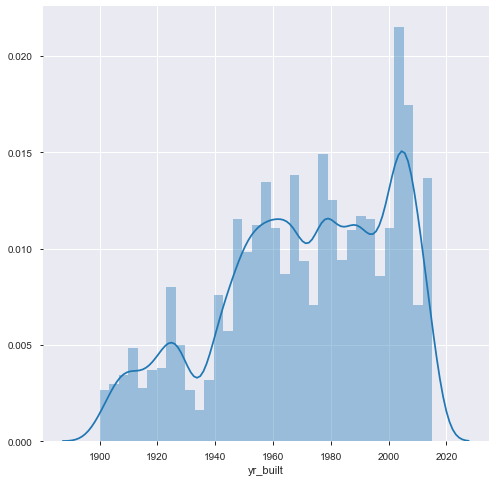

In [47]:
#looking at the distribubtion of properties base on year built

plt.figure(figsize = (8,8))
ax = sns.distplot(df['yr_built'])


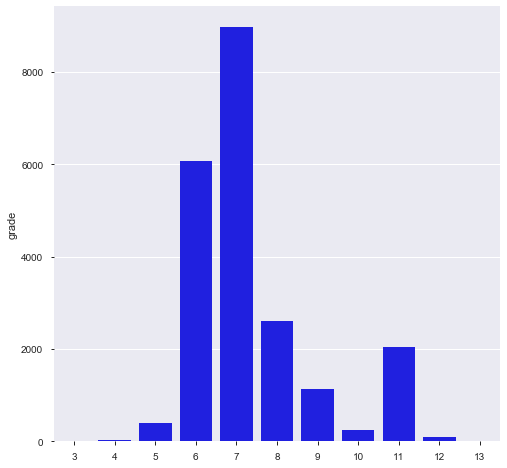

In [48]:
#checking the number of properties based on grade
plt.figure(figsize = (8,8))
ax2= sns.barplot(df['grade'].unique(), df['grade'].value_counts(), color='blue')

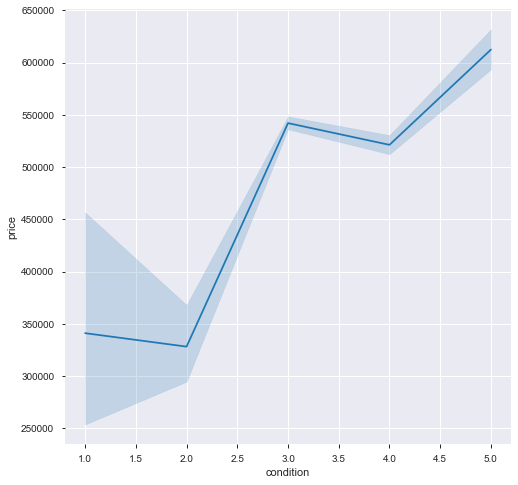

In [49]:
#comparing whether the price increases with condition
plt.figure(figsize = (8,8))
ax= sns.lineplot(df['condition'], df['price'])

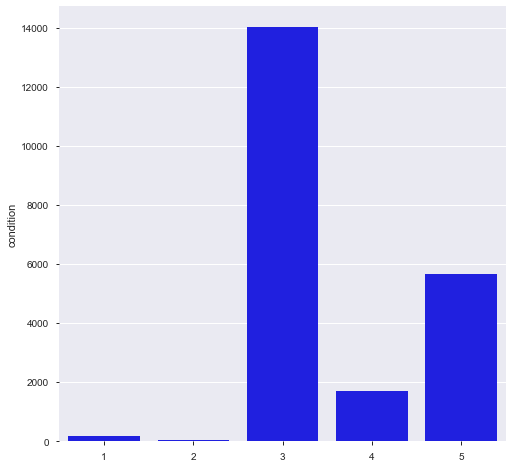

In [50]:
plt.figure(figsize = (8,8))
ax= sns.barplot(df.condition.unique(), df.condition.value_counts(), color = 'blue')

In [51]:
#due to an error in the above plot we have decide to create a pandas series based on the unique values of 
#Condition in order to plot it out correctly.
con=df['condition'].value_counts()
con

3    14018
4     5676
5     1700
2      170
1       29
Name: condition, dtype: int64

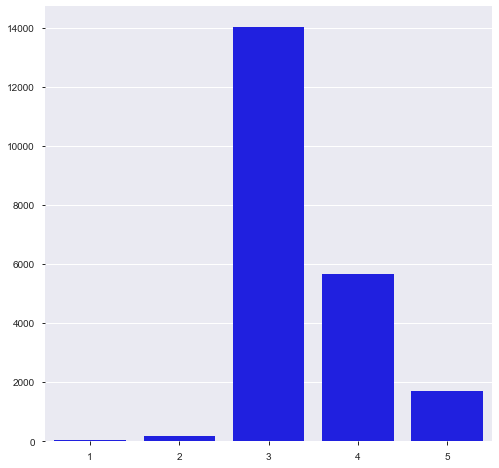

In [52]:
# here we have a correct plot based on the pandas series.

plt.figure(figsize = (8,8))
ax= sns.barplot(con.index, con.values, color = 'blue')

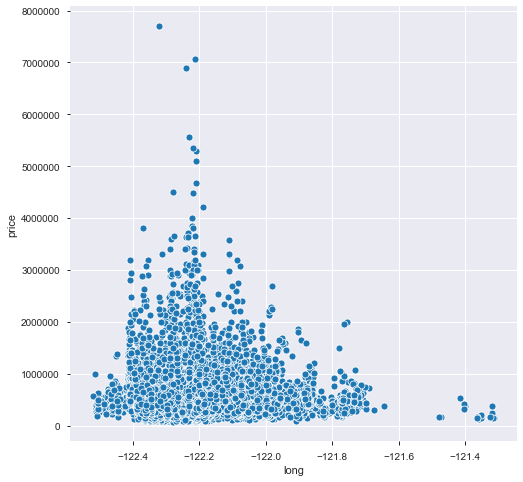

In [53]:
#Comparing price based on longitudinal location
plt.figure(figsize = (8,8))
ax= sns.scatterplot(df['long'], df['price'])

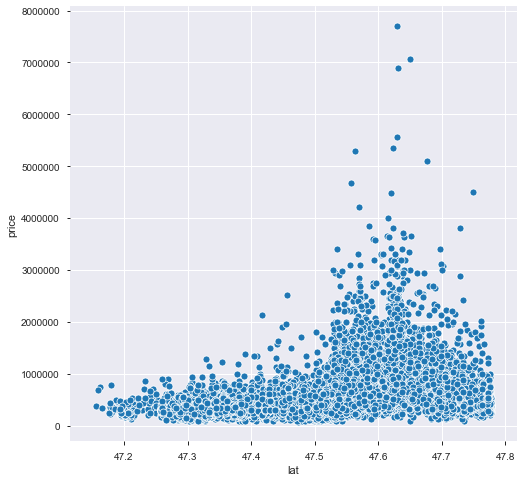

In [54]:
#comparing price based on latitudinal location

plt.figure(figsize = (8,8))
ax= sns.scatterplot(df['lat'], df['price'])

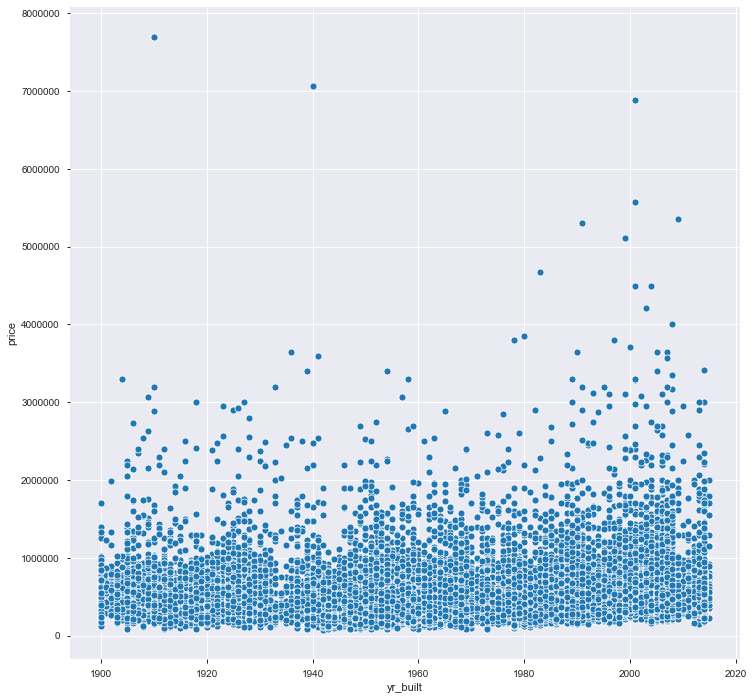

In [55]:
#checking if year built has any effect on price. 
#based on the plot below, there is no correlation.

plt.figure(figsize = (12,12))
ax= sns.scatterplot(df['yr_built'], df['price'])

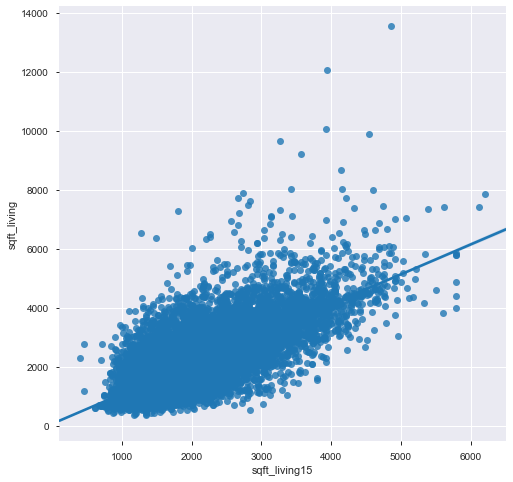

In [56]:
#when comparing the sqft_living with sqft_living15 we can see a slight correlation 

plt.figure(figsize = (8,8))
ax= sns.regplot(df['sqft_living15'], df['sqft_living'])

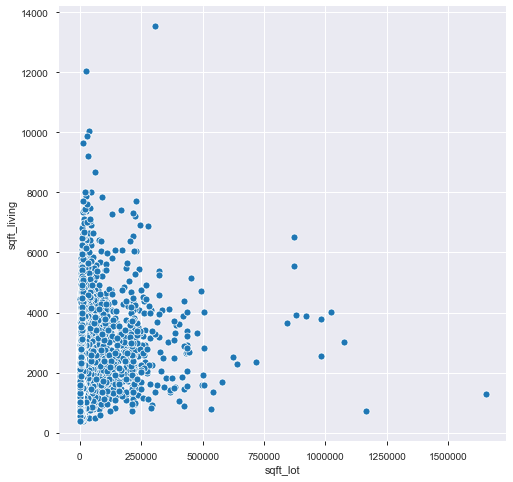

In [57]:
# plotting sqft_lot to sqft_living, however this does give an accurate indication of the size of the 
# properties as houses can be built up on several floors

plt.figure(figsize = (8,8))
ax= sns.scatterplot(df['sqft_lot'], df['sqft_living'])

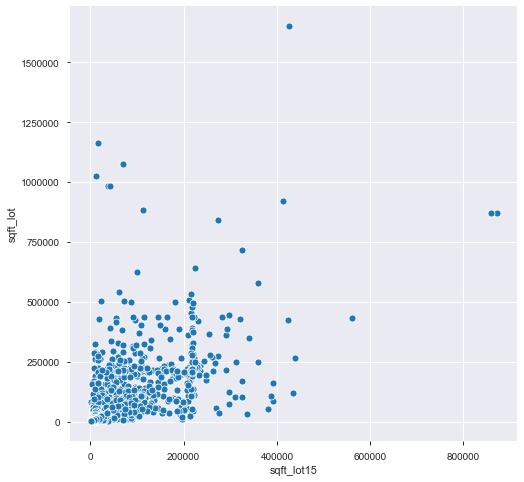

In [58]:
#checking to see if the is a direct correlation size of the lot and the neighboring property lots

plt.figure(figsize = (8,8))
ax= sns.scatterplot(df['sqft_lot15'], df['sqft_lot'])

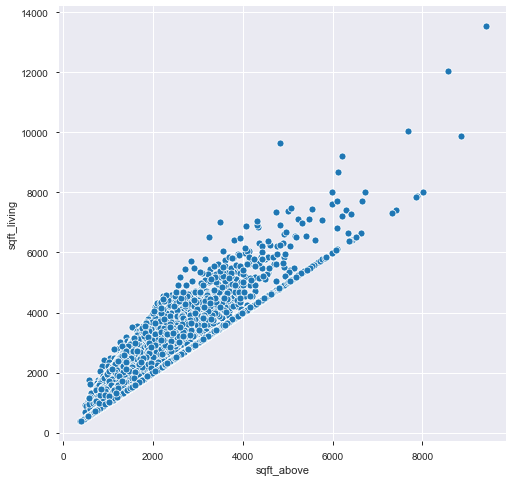

In [59]:
# There is however a stong correlation between linving space and sqft above the basement.
plt.figure(figsize = (8,8))
ax= sns.scatterplot(df['sqft_above'], df['sqft_living'])

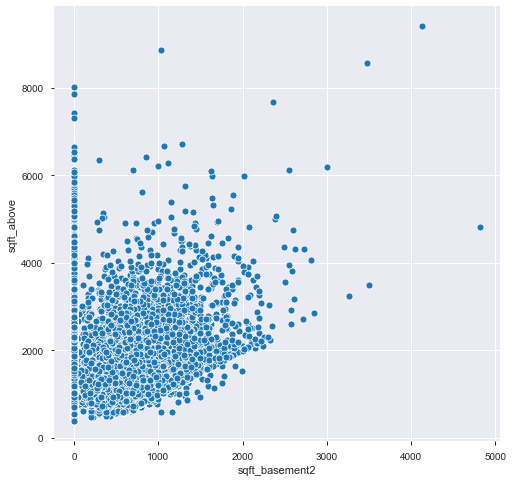

In [60]:
#there is no real correlation between the basement size and the sqft above. There fore it would dificult to 
# predict the size of the living area above the basement.

plt.figure(figsize = (8,8))
ax= sns.scatterplot(df['sqft_basement2'], df['sqft_above'])

## Creating our subsets 

We initially sorted our dataframe in descending order of price, afterwhich we created a subset of the 2000 most expensive properties.

In [61]:
most_expensive_df = df.sort_values('price', ascending = False)

In [62]:
most_expensive_2000 = most_expensive_df.iloc[0:2000]

In [63]:
most_expensive_2000.head()

id        date      price  bedrooms  bathrooms  sqft_living  \
7245  6762700020  10/13/2014  7700000.0         6       8.00        12050   
3910  9808700762   6/11/2014  7060000.0         5       4.50        10040   
9245  9208900037   9/19/2014  6890000.0         6       7.75         9890   
4407  2470100110    8/4/2014  5570000.0         5       5.75         9200   
1446  8907500070   4/13/2015  5350000.0         5       5.00         8000   

      sqft_lot  floors  waterfront  condition  ...  yr_renovated  zipcode  \
7245     27600     2.5         0.0          4  ...        1987.0    98102   
3910     37325     2.0         1.0          3  ...        2001.0    98004   
9245     31374     2.0         0.0          3  ...           0.0    98039   
4407     35069     2.0         0.0          3  ...           0.0    98039   
1446     23985     2.0         0.0          3  ...           0.0    98004   

          lat     long  sqft_living15  sqft_lot15  \
7245  47.6298 -122.323           3940        8800   
3910  47.6500 -122.214           3930       25449   
9245  47.6305 -122.240           4540       42730   
4407  47.6289 -122.233           3560       24345   
1446  47.6232 -122.220           4600       21750   

                         geometry  sqft_basement2  basement_bool basement  
7245  POINT (-122.32300 47.62980)            3480           True        1  
3910  POINT (-122.21400 47.65000)            2360           True        1  
9245  POINT (-122.24000 47.63050)            1030           True        1  
4407  POINT (-122.23300 47.62890)            3000           True        1  
1446  POINT (-122.22000 47.62320)            1280           True        1  

[5 rows x 23 columns]

In [64]:
most_expensive_2000.tail()

id       date     price  bedrooms  bathrooms  sqft_living  \
18933  3982700088   4/2/2015  910000.0         3       2.50         2720   
14862  1125059071  5/22/2014  910000.0         4       3.25         3340   
15637   871001980   5/6/2014  910000.0         3       3.50         3020   
20665  1233100710  4/16/2015  909950.0         5       3.75         3050   
19863  8562710640  2/11/2015  909500.0         4       4.00         4420   

       sqft_lot  floors  waterfront  condition  ...  yr_renovated  zipcode  \
18933      7250     2.0         0.0          3  ...           0.0    98033   
14862     10890     1.5         0.0          3  ...        2000.0    98052   
15637      4082     2.0         0.0          3  ...        2004.0    98199   
20665      8972     2.0         0.0          3  ...           0.0    98033   
19863      5940     2.0         0.0          3  ...           0.0    98027   

           lat     long  sqft_living15  sqft_lot15  \
18933  47.6894 -122.195           2870        7250   
14862  47.6677 -122.136           2880        9794   
15637  47.6510 -122.409           2060        5102   
20665  47.6819 -122.172           2750        8979   
19863  47.5397 -122.072           4510        5797   

                          geometry  sqft_basement2  basement_bool basement  
18933  POINT (-122.19500 47.68940)               0           True        0  
14862  POINT (-122.13600 47.66770)            1100           True        1  
15637  POINT (-122.40900 47.65100)             940           True        1  
20665  POINT (-122.17200 47.68190)               0           True        0  
19863  POINT (-122.07200 47.53970)            1010           True        1  

[5 rows x 23 columns]

In [65]:
print("Of the 2,000 most expensive properties:")
print("The most expensive property value is:" , most_expensive_2000.price.max())
print("The least expensive property value is:" , most_expensive_2000.price.min())

Of the 2,000 most expensive properties:
The most expensive property value is: 7700000.0
The least expensive property value is: 909500.0


In [159]:
#Creating the geopandas dataframe inorder to map out our most expensive properties on a map

index_list=list(most_expensive_2000.index.values)

In [156]:
len(index_list)

2000

In [68]:
me2000_geo_df = geo_df[geo_df.index.map(lambda x: x in index_list)]

In [161]:
me2000_geo_df.head()

id       date      price  bedrooms  bathrooms  sqft_living  \
5   7237550310  5/12/2014  1230000.0         4       4.50         5420   
21  2524049179  8/26/2014  2000000.0         3       2.75         3050   
26  1794500383  6/26/2014   937000.0         3       1.75         2450   
49   822039084  3/11/2015  1350000.0         3       2.50         2753   
54  4217401195   3/3/2015   920000.0         5       2.25         2730   

    sqft_lot  floors  waterfront  condition  ...  yr_built  yr_renovated  \
5     101930     1.0         0.0          3  ...      2001           0.0   
21     44867     1.0         0.0          3  ...      1968           0.0   
26      2691     2.0         0.0          3  ...      1915           0.0   
49     65005     1.0         1.0          5  ...      1953           0.0   
54      6000     1.5         0.0          3  ...      1927           0.0   

    zipcode      lat     long  sqft_living15  sqft_lot15  \
5     98053  47.6561 -122.005           4760      101930   
21    98040  47.5316 -122.233           4110       20336   
26    98119  47.6386 -122.360           1760        3573   
49    98070  47.4041 -122.451           2680       72513   
54    98105  47.6571 -122.281           2730        6000   

                       geometry  sqft_basement2  basement_bool  
5   POINT (-122.00500 47.65610)            1530           True  
21  POINT (-122.23300 47.53160)             720           True  
26  POINT (-122.36000 47.63860)             700           True  
49  POINT (-122.45100 47.40410)             588           True  
54  POINT (-122.28100 47.65710)             600           True  

[5 rows x 23 columns]

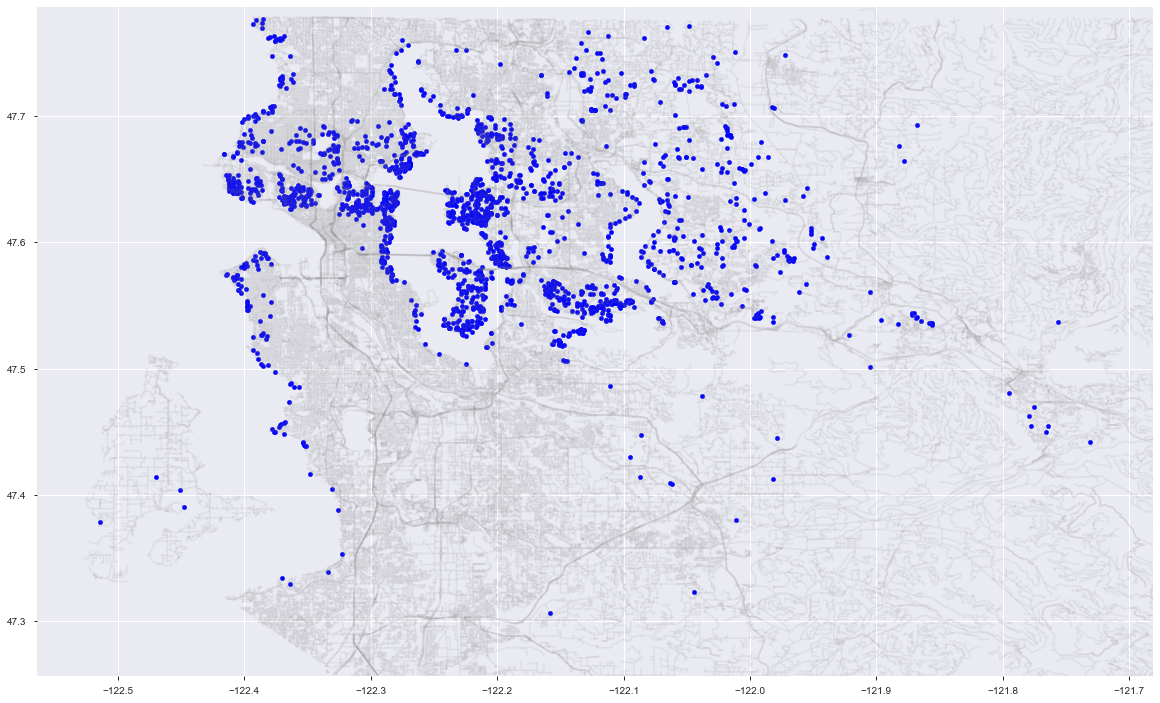

In [70]:
# by mapping the location of our most expensive properties we can see that there are a few clusters, also the 
# vast majority are along or near the waterfront.

fig, ax = plt.subplots(figsize = (20,20))
street_map.plot(ax =ax, alpha = 0.1, color = "grey")
me2000_geo_df.plot(ax=ax, markersize = 20, color='blue')
minx, miny, maxx, maxy = me2000_geo_df.total_bounds
ax.set_xlim(minx-0.05, maxx+0.05)
ax.set_ylim(miny-0.05, maxy+0.01)
plt.savefig('most_expensive_2000.png')

In [71]:
# With regards to the waterfront properties we can safely assume that the the properties that are between longitudes
# -122.4 & -122.1 are mostly waterfront properties or have a waterfront view

most_expensive_2000.loc[(most_expensive_2000['long'] > -122.4) & (most_expensive_2000['long'] < -122.1), 'waterfront'] = 1

In [72]:
most_expensive_2000.waterfront.value_counts()

1.0    1629
0.0     371
Name: waterfront, dtype: int64

In [73]:
most_expensive_2000.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2000 entries, 7245 to 19863
Data columns (total 23 columns):
id                2000 non-null int64
date              2000 non-null object
price             2000 non-null float64
bedrooms          2000 non-null int64
bathrooms         2000 non-null float64
sqft_living       2000 non-null int64
sqft_lot          2000 non-null int64
floors            2000 non-null float64
waterfront        2000 non-null float64
condition         2000 non-null int64
grade             2000 non-null int64
sqft_above        2000 non-null int64
yr_built          2000 non-null int64
yr_renovated      2000 non-null float64
zipcode           2000 non-null int64
lat               2000 non-null float64
long              2000 non-null float64
sqft_living15     2000 non-null int64
sqft_lot15        2000 non-null int64
geometry          2000 non-null geometry
sqft_basement2    2000 non-null int64
basement_bool     2000 non-null bool
basement          2000 non-null int6

In [74]:
df.waterfront.value_counts()

0.0    21447
1.0      146
Name: waterfront, dtype: int64

In [75]:
#checking to see if the are popular zipcodes among the 2000 most expensive properties. zipcode 98004 has roughly 10% 
# of the most expensive properties in it.

most_expensive_2000['zipcode'].value_counts().head(10)

98004    216
98040    173
98006    161
98112    136
98033    106
98199     84
98105     71
98075     66
98115     56
98053     52
Name: zipcode, dtype: int64

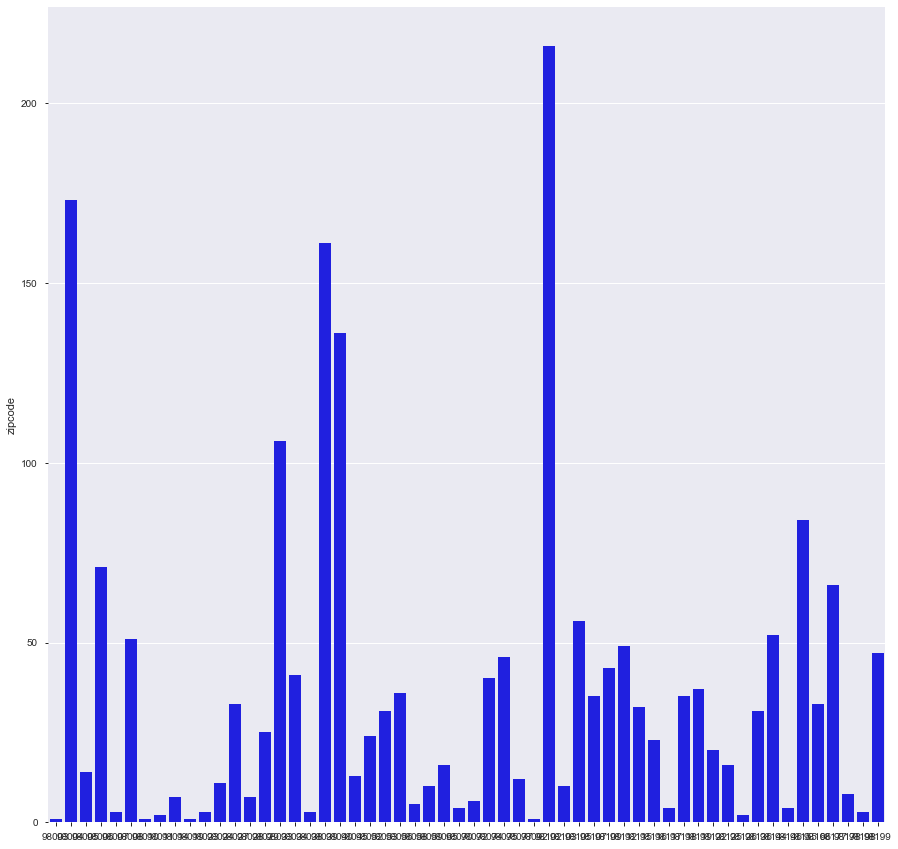

In [76]:
# Plotting our most expensive properties to zipcodes to see if there are any zipcodes that a high concentration of 
# properties. 

# however looking at the results, even though there are a few zipcode that have quite a few of the most expensive
# they are spread out.

plt.figure(figsize = (15,15))
ax = sns.barplot(most_expensive_2000['zipcode'].unique(), most_expensive_2000['zipcode'].value_counts(), color = 'blue')

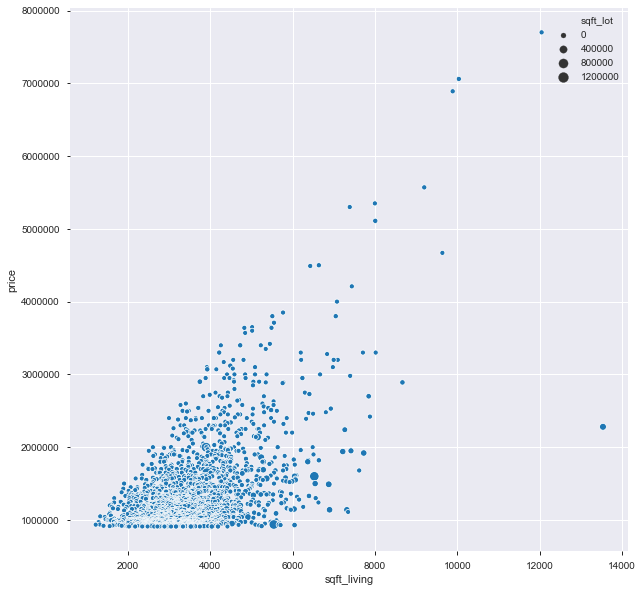

In [77]:
# Comparing sqft_living and price and lot size.
# There is no direct 
plt.figure(figsize = (10,10))
ax= sns.scatterplot(most_expensive_2000['sqft_living'], most_expensive_2000['price'], size = most_expensive_2000['sqft_lot'])

In [78]:
#We are subtracting the 2000 most expensive properties from the main dataframe in order to create a sample set
df_minus2000 = df.drop(most_expensive_2000.index, axis=0)
df_minus2000.head()

id        date     price  bedrooms  bathrooms  sqft_living  \
0  7129300520  10/13/2014  221900.0         3       1.00         1180   
1  6414100192   12/9/2014  538000.0         3       2.25         2570   
2  5631500400   2/25/2015  180000.0         2       1.00          770   
3  2487200875   12/9/2014  604000.0         4       3.00         1960   
4  1954400510   2/18/2015  510000.0         3       2.00         1680   

   sqft_lot  floors  waterfront  condition  ...  yr_renovated  zipcode  \
0      5650     1.0         0.0          3  ...           0.0    98178   
1      7242     2.0         0.0          3  ...        1991.0    98125   
2     10000     1.0         0.0          3  ...           0.0    98028   
3      5000     1.0         0.0          5  ...           0.0    98136   
4      8080     1.0         0.0          3  ...           0.0    98074   

       lat     long  sqft_living15  sqft_lot15                     geometry  \
0  47.5112 -122.257           1340        5650  POINT (-122.25700 47.51120)   
1  47.7210 -122.319           1690        7639  POINT (-122.31900 47.72100)   
2  47.7379 -122.233           2720        8062  POINT (-122.23300 47.73790)   
3  47.5208 -122.393           1360        5000  POINT (-122.39300 47.52080)   
4  47.6168 -122.045           1800        7503  POINT (-122.04500 47.61680)   

   sqft_basement2  basement_bool basement  
0               0           True        0  
1             400           True        1  
2               0           True        0  
3             910           True        1  
4               0           True        0  

[5 rows x 23 columns]

In [131]:
df_sample2000 = df_minus2000.sample(n=2000, random_state = 6)
df_sample2000.head()

id        date     price  bedrooms  bathrooms  sqft_living  \
18714  5416500040  10/17/2014  309000.0         3        2.5         1990   
7624   7183000120   8/12/2014  380000.0         4        2.5         2500   
19781  3832050890   7/15/2014  282000.0         3        2.5         2010   
14868  8679400130    5/6/2015  353000.0         4        1.5         1100   
17344  7202330170   7/17/2014  438000.0         3        2.5         1650   

       sqft_lot  floors  waterfront  condition  ...  yr_renovated  zipcode  \
18714      3614     2.0         0.0          3  ...           0.0    98038   
7624      11070     1.0         0.0          4  ...           0.0    98003   
19781      5399     2.0         0.0          3  ...           0.0    98042   
14868      9600     1.0         0.0          4  ...           0.0    98033   
17344      3031     2.0         0.0          3  ...           0.0    98053   

           lat     long  sqft_living15  sqft_lot15  \
18714  47.3600 -122.039           1980        3800   
7624   47.3360 -122.334           2500       11070   
19781  47.3338 -122.052           2280        5141   
14868  47.7000 -122.175           1100        9630   
17344  47.6820 -122.034           1560        3070   

                          geometry  sqft_basement2  basement_bool basement  
18714  POINT (-122.03900 47.36000)               0          False        0  
7624   POINT (-122.33400 47.33600)            1200           True        1  
19781  POINT (-122.05200 47.33380)               0           True        0  
14868  POINT (-122.17500 47.70000)               0           True        0  
17344  POINT (-122.03400 47.68200)               0           True        0  

[5 rows x 23 columns]

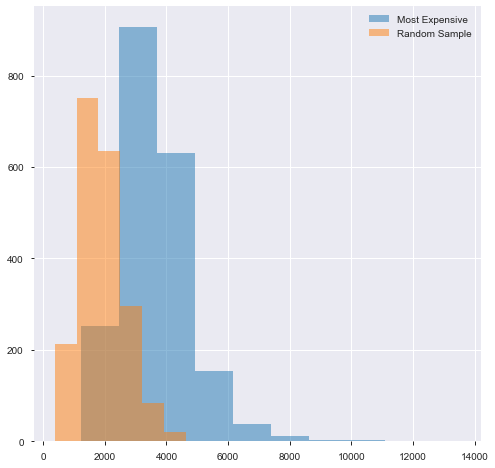

In [80]:
#comparing sqft_living of the most expensive properties and the random sample. Clearly the most expensive properties 
# a larger living areas even though there is a slight overlap.

plt.figure(figsize = (8,8))
ax= plt.hist(most_expensive_2000['sqft_living'], alpha = 0.5, label = 'Most Expensive')
ax2 = plt.hist(df_sample2000['sqft_living'], alpha = 0.5, label = 'Random Sample')
plt.legend()

In [81]:


list_beds1=list(most_expensive_2000.bedrooms.value_counts())
list_beds2=list(df_sample2000.bedrooms.value_counts())

In [82]:
# comparing the two data sets based on the number of bedrooms

# The mode number of bedroom of the most expensive properties is 4 

me_beds = most_expensive_2000.bedrooms.value_counts()
me_beds

4     1013
3      451
5      405
6       64
2       47
7       11
8        4
9        3
10       1
1        1
Name: bedrooms, dtype: int64

In [83]:
# The mode number of bedroom of the most expensive properties is 3

sample_beds = df_sample2000.bedrooms.value_counts()
sample_beds

3    973
4    596
2    251
5    128
6     25
1     25
7      2
Name: bedrooms, dtype: int64

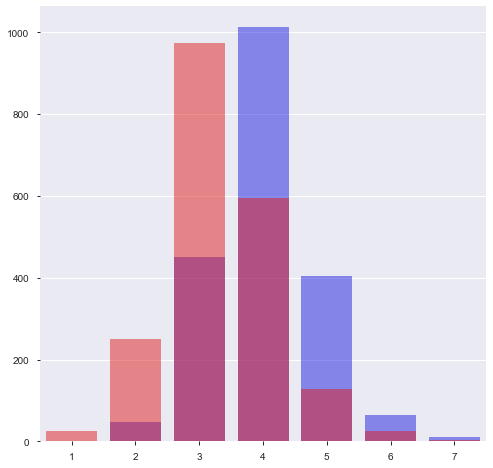

In [84]:
#There are actually more 3 bedrooms in our sample set then there are in our most expensive properties 

plt.figure(figsize = (8,8))
ax= sns.barplot(me_beds.index.values, me_beds.values, color = 'blue', alpha = 0.5)
ax2 = sns.barplot(sample_beds.index.values, sample_beds.values, color = 'red', alpha = 0.5)

In [85]:
print("The mean number of bedroom in the most expensive properties is:", most_expensive_2000.bedrooms.mean())
print("The mean number of bedrooms in the sample is: ", df_sample2000.bedrooms.mean())

The mean number of bedroom in the most expensive properties is: 4.0275
The mean number of bedrooms in the sample is:  3.317


In [86]:
most_expensive_2000.bedrooms.unique()

array([ 6,  5,  4,  3,  8,  2,  7,  9,  1, 10])

In [87]:
#grouping the sample sets by number rooms in order to get the mean values for comparitive reasons
me_bed_mean = most_expensive_2000.groupby('bedrooms').mean()

In [88]:
me_bed_mean

id         price  bathrooms  sqft_living      sqft_lot  \
bedrooms                                                                     
1         7.240690e+08  1.250000e+06   1.250000  1810.000000   5070.000000   
2         4.799409e+09  1.245184e+06   2.250000  2549.148936  35501.382979   
3         4.159571e+09  1.285904e+06   2.578714  2992.394678  18063.447894   
4         4.202839e+09  1.343951e+06   3.074778  3646.013820  26864.127345   
5         4.336820e+09  1.522837e+06   3.465432  4111.355556  19083.222222   
6         4.119156e+09  1.712451e+06   3.824219  4663.359375  26076.765625   
7         3.596196e+09  1.853182e+06   4.386364  5632.727273  43017.636364   
8         1.255600e+09  2.267500e+06   4.062500  5132.500000  12077.750000   
9         9.156834e+09  1.204667e+06   3.833333  3696.666667   4996.000000   
10        6.273001e+08  1.150000e+06   5.250000  4590.000000  10920.000000   

            floors  waterfront  condition      grade   sqft_above  \
bedrooms                                                            
1         1.500000    1.000000   4.000000   8.000000  1230.000000   
2         1.765957    0.872340   3.531915   9.000000  2094.255319   
3         1.684035    0.860310   3.490022   9.126386  2442.949002   
4         1.815400    0.777887   3.468904   9.688055  3086.842053   
5         1.834568    0.837037   3.419753   9.770370  3350.960494   
6         1.968750    0.859375   3.531250   9.796875  3549.140625   
7         2.090909    0.818182   3.363636  10.181818  4400.000000   
8         2.125000    1.000000   4.250000   9.750000  3897.500000   
9         2.166667    1.000000   3.000000   8.666667  2760.000000   
10        1.000000    1.000000   3.000000   9.000000  2500.000000   

             yr_built  yr_renovated       zipcode        lat        long  \
bedrooms                                                                   
1         1967.000000      0.000000  98075.000000  47.581400 -122.081000   
2         1970.787234    211.659574  98088.808511  47.613419 -122.241000   
3         1966.858093    212.778271  98083.922395  47.621609 -122.258847   
4         1976.626851    161.853899  98066.036525  47.616766 -122.205117   
5         1979.318519    163.088889  98060.288889  47.616516 -122.203099   
6         1965.718750    249.296875  98078.406250  47.618241 -122.240625   
7         1972.636364    364.363636  98051.727273  47.617627 -122.194273   
8         1948.000000      0.000000  98058.000000  47.630725 -122.260000   
9         1916.000000    670.000000  98105.000000  47.664733 -122.301667   
10        2008.000000      0.000000  98004.000000  47.586100 -122.113000   

          sqft_living15    sqft_lot15  sqft_basement2  basement_bool  basement  
bedrooms                                                                        
1           2280.000000   5070.000000      580.000000       1.000000  1.000000  
2           2525.297872  22248.893617      454.893617       0.957447  0.510638  
3           2731.148559  13842.017738      549.445676       0.984479  0.603104  
4           3034.893386  19919.999013      559.171767       0.979269  0.532083  
5           3114.444444  15476.743210      760.395062       0.980247  0.614815  
6           3117.890625  20157.000000     1114.218750       1.000000  0.781250  
7           3304.545455  29857.090909     1232.727273       1.000000  0.727273  
8           3592.500000  11641.250000     1235.000000       1.000000  0.750000  
9           2560.000000   4573.333333      936.666667       1.000000  1.000000  
10          2730.000000  10400.000000     2090.000000       1.000000  1.000000

In [89]:
df_sample_bed_mean = df_sample2000.groupby('bedrooms').mean()

In [90]:
df_sample_bed_mean

id          price  bathrooms  sqft_living      sqft_lot  \
bedrooms                                                                      
1         4.502340e+09  328338.000000   1.100000   946.000000   5902.400000   
2         4.307694e+09  379573.605578   1.398406  1186.980080  16292.617530   
3         4.576968e+09  420691.569373   1.908016  1729.741007  13612.017472   
4         4.648991e+09  509822.411074   2.345218  2356.533557  14639.093960   
5         4.056307e+09  550853.273438   2.492188  2674.468750  16479.984375   
6         4.334194e+09  545664.000000   2.970000  2753.360000   8192.040000   
7         6.494000e+09  545500.000000   3.875000  4915.000000  25150.000000   

            floors  waterfront  condition     grade   sqft_above     yr_built  \
bedrooms                                                                        
1         1.160000    0.000000   3.400000  6.240000   819.200000  1937.800000   
2         1.340637    0.007968   3.334661  6.776892  1054.948207  1957.250996   
3         1.441932    0.001028   3.374101  7.374101  1535.014388  1972.373073   
4         1.614933    0.001678   3.369128  7.847315  2052.104027  1978.184564   
5         1.460938    0.000000   3.460938  7.828125  2054.742188  1973.312500   
6         1.420000    0.000000   3.440000  7.440000  1954.960000  1966.360000   
7         1.500000    0.000000   3.000000  9.000000  3315.000000  1957.500000   

          yr_renovated       zipcode        lat        long  sqft_living15  \
bedrooms                                                                     
1           236.640000  98119.640000  47.586776 -122.287520    1443.600000   
2           110.908367  98105.541833  47.598145 -122.281653    1503.856574   
3            75.710175  98077.558068  47.550962 -122.207522    1770.436793   
4            70.360738  98069.176174  47.542984 -122.180035    2150.046980   
5            15.742188  98073.093750  47.573823 -122.211211    2304.257812   
6             0.000000  98084.600000  47.575620 -122.249960    1998.000000   
7             0.000000  98142.000000  47.503750 -122.322500    2155.000000   

            sqft_lot15  sqft_basement2  basement_bool  basement  
bedrooms                                                         
1          6866.480000      126.800000       1.000000  0.240000  
2          9604.864542      132.031873       0.972112  0.298805  
3         12429.936280      194.726619       0.982528  0.327852  
4         12509.151007      304.429530       0.981544  0.389262  
5         13095.601562      619.726562       0.984375  0.617188  
6          7206.960000      798.400000       1.000000  0.800000  
7         20278.000000     1600.000000       1.000000  1.000000

In [91]:
me_beds_sr = most_expensive_2000.bedrooms.value_counts()
sample_beds_sr = df_sample2000.bedrooms.value_counts()

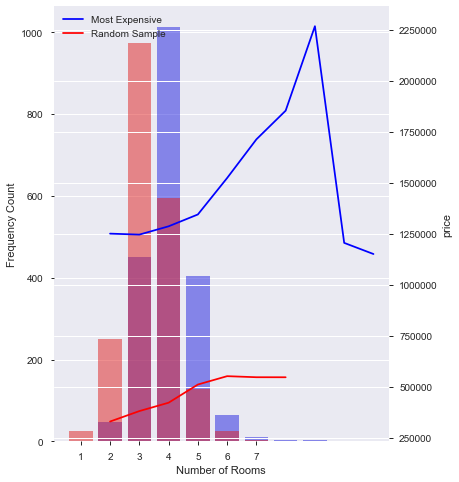

In [92]:
# comparing the number of bedrooms and price. we can see a clear difference in starting prices for 2 bedroom 
# properties how ever we can see that the price drops drastically at 9 rooms for the most expensive properties.
plt.figure(figsize = (6,8))
plt.xlabel('Number of Rooms')
plt.ylabel('Frequency Count')

ax= sns.barplot(me_beds_sr.index.values, me_beds_sr.values, color = 'blue', alpha = 0.5, label = 'Most Expensive')

ax2 = (sns.barplot(sample_beds_sr.index.values, sample_beds_sr.values, color = 'red', alpha = 0.5, 
                   label = 'Random Sample'))
ax3 = plt.twinx()

ax3= sns.lineplot(me_bed_mean.index.values, me_bed_mean['price'],color='blue', alpha = 1, label = 'Most Expensive' )

ax4= (sns.lineplot(df_sample_bed_mean.index.values, df_sample_bed_mean['price'],color='red', alpha = 1, 
                   label = 'Random Sample'))
plt.legend()

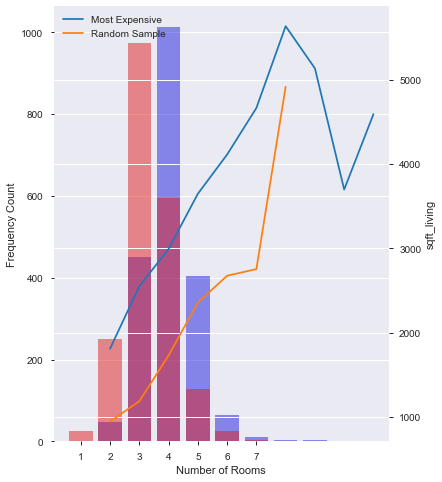

In [133]:
# comparing the number of bedrooms and sqft_living. here too we can see a clear difference in starting sqaure footage
# for 2 bedroom properties. 

# from this char we can understand why the price drops drastically at 9 rooms for the most expensive properties as 
# as the sqft_ving drastically drops as well

plt.figure(figsize = (6,8))
plt.xlabel('Number of Rooms')
plt.ylabel('Frequency Count')

ax= sns.barplot(me_beds_sr.index.values, me_beds_sr.values, color = 'blue', alpha = 0.5,label = 'Most Expensive')

ax2 = (sns.barplot(sample_beds_sr.index.values, sample_beds_sr.values, color = 'red', alpha = 0.5, 
                   label = 'Random Sample'))

ax3 = plt.twinx()

ax3= sns.lineplot(me_bed_mean.index.values, me_bed_mean['sqft_living'], alpha = 1, label = 'Most Expensive')

ax4= (sns.lineplot(df_sample_bed_mean.index.values, df_sample_bed_mean['sqft_living'], alpha = 1, 
                   label = 'Random Sample'))

plt.legend()


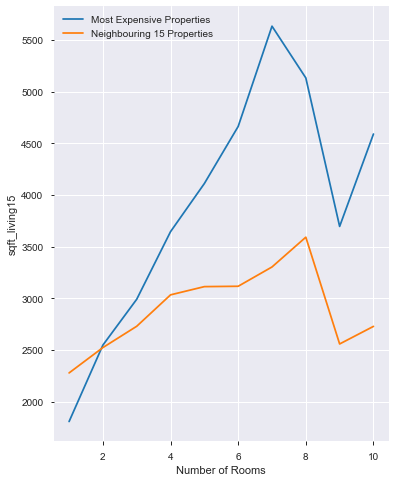

In [94]:
# the mean sqft_living for the number of bedrooms in comparison to the mean sqft_living for the neighbouring 
# properties we can see that the most expensive properties are generally larger than their neighbouring properties 
# based on the number of bedrooms

plt.figure(figsize = (6,8))
plt.xlabel('Number of Rooms')
plt.ylabel('Sqft Living')

ax3= sns.lineplot(me_bed_mean.index.values, me_bed_mean['sqft_living'], alpha = 1,label = 'Most Expensive Properties')

ax4= (sns.lineplot(me_bed_mean.index.values, me_bed_mean['sqft_living15'], alpha = 1, 
                   label = 'Neighbouring 15 Properties'))



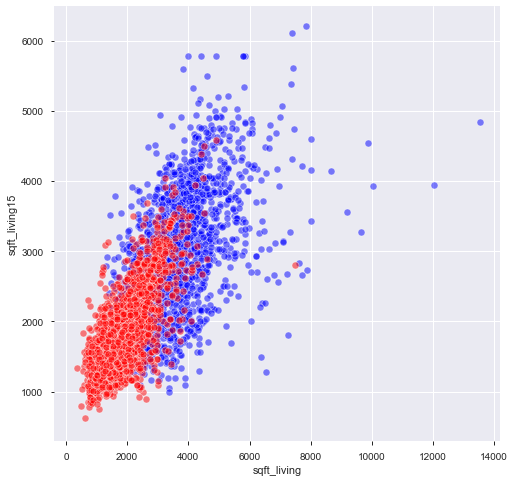

In [95]:
# by ploting all the data point for both subsets we can get a deeper look into how sqft_living and 
# sqft_liiving15 correlate 
plt.figure(figsize = (8,8))

ax = (sns.scatterplot(most_expensive_2000['sqft_living'],most_expensive_2000['sqft_living15'], alpha =0.5, 
                      color = "blue"))

ax2 = sns.scatterplot(df_sample2000['sqft_living'],df_sample2000['sqft_living15'], alpha = 0.5, color = 'red')

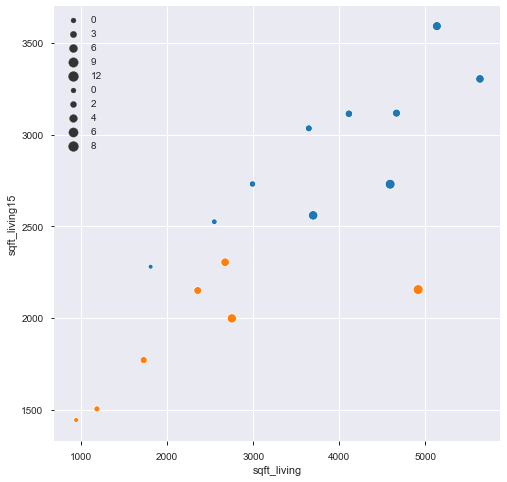

In [96]:
# We can see that there is a greater correlation between the mean sqft_living at the sqft_living15 of the most
#expensive properties than the random sample 
plt.figure(figsize = (8,8))

ax = sns.scatterplot(me_bed_mean['sqft_living'],me_bed_mean['sqft_living15'], size = me_bed_mean.index.values)

ax2 = (sns.scatterplot(df_sample_bed_mean['sqft_living'],df_sample_bed_mean['sqft_living15'],
                       size = df_sample_bed_mean.index.values))

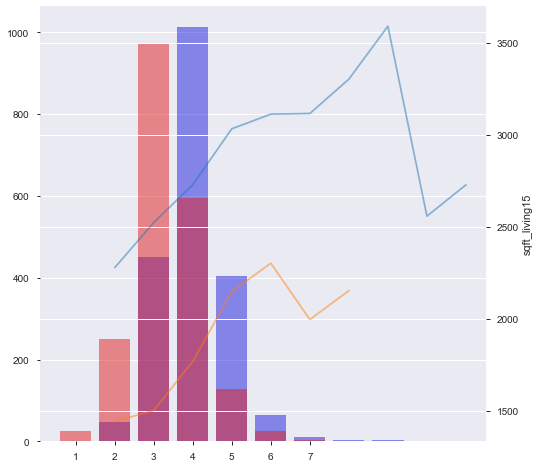

In [97]:
#Plotted this graph to see the correlation between the number of bedrooms and the mean of sqft_living15.
# Graph shows for the most expensive properties, the neighbouring properties also increase in size till 8 bedrooms 
# While the random sample neighbouring properties begin to shrink after 6 bedrooms
plt.figure(figsize = (8,8))

ax= sns.barplot(me_beds.index.values, me_beds.values, color = 'blue', alpha = 0.5)
ax2 = sns.barplot(sample_beds.index.values, sample_beds.values, color = 'red', alpha = 0.5)

ax3 = plt.twinx()
ax3= sns.lineplot(me_bed_mean.index.values, me_bed_mean['sqft_living15'], alpha = 0.5)
ax4= sns.lineplot(df_sample_bed_mean.index.values, df_sample_bed_mean['sqft_living15'], alpha = 0.5)

In [98]:
#Creating the geo_plots for the randon sample 
index_list2=list(df_sample2000.index.values)

In [99]:
sample2000_geo_df = geo_df[geo_df.index.map(lambda x: x in index_list2)]

In [100]:
sample2000_geo_df.head()

id        date     price  bedrooms  bathrooms  sqft_living  \
8   2414600126   4/15/2015  229500.0         3        1.0         1780   
11  9212900260   5/27/2014  468000.0         2        1.0         1160   
17  6865200140   5/29/2014  485000.0         4        1.0         1600   
19  7983200060   4/24/2015  230000.0         3        1.0         1250   
30  8562750320  11/10/2014  580500.0         3        2.5         2320   

    sqft_lot  floors  waterfront  condition  ...  yr_built  yr_renovated  \
8       7470     1.0         0.0          3  ...      1960           0.0   
11      6000     1.0         0.0          4  ...      1942           0.0   
17      4300     1.5         0.0          4  ...      1916           0.0   
19      9774     1.0         0.0          4  ...      1969           0.0   
30      3980     2.0         0.0          3  ...      2003           0.0   

    zipcode      lat     long  sqft_living15  sqft_lot15  \
8     98146  47.5123 -122.337           1780        8113   
11    98115  47.6900 -122.292           1330        6000   
17    98103  47.6648 -122.343           1610        4300   
19    98003  47.3343 -122.306           1280        8850   
30    98027  47.5391 -122.070           2580        3980   

                       geometry  sqft_basement2  basement_bool  
8   POINT (-122.33700 47.51230)             730           True  
11  POINT (-122.29200 47.69000)             300           True  
17  POINT (-122.34300 47.66480)               0           True  
19  POINT (-122.30600 47.33430)               0           True  
30  POINT (-122.07000 47.53910)               0           True  

[5 rows x 23 columns]

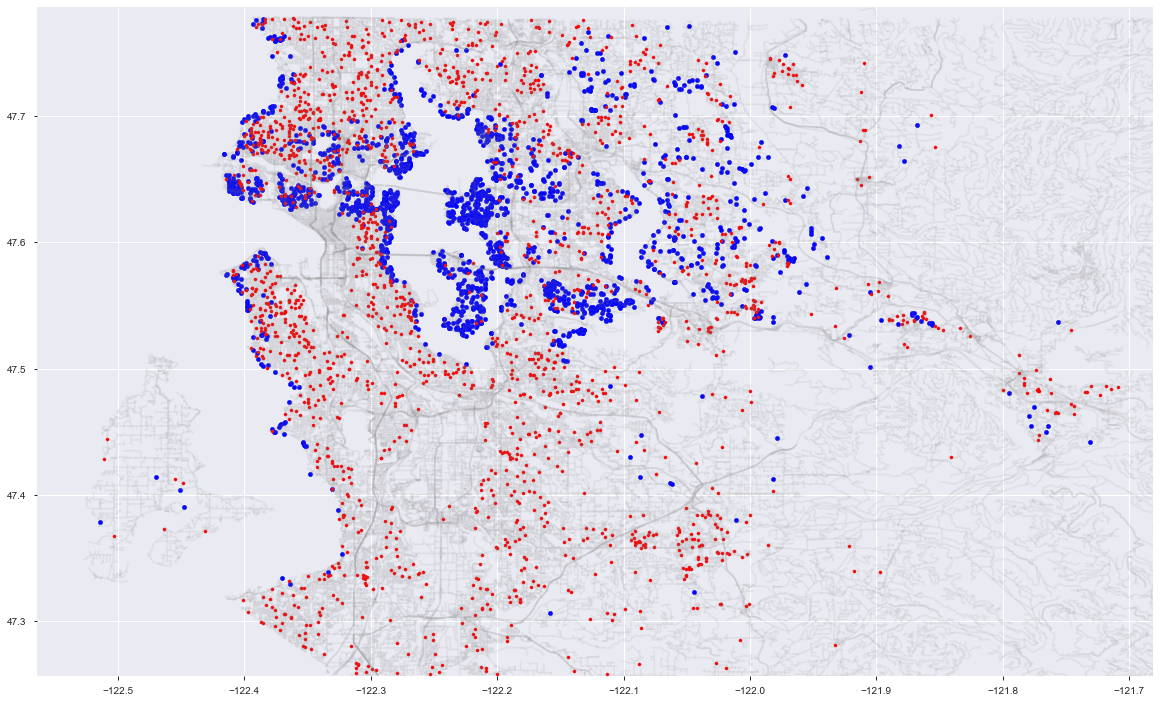

In [101]:
# The geo_plot shows the most expensive properties mapped in blue dots and the random sample properties
# mapped in red dots. 

# We can see that that vast majjority of the random sample are more inland than the most expensive properties

fig, ax = plt.subplots(figsize = (20,20))
street_map.plot(ax =ax, alpha = 0.1, color = "grey")
me2000_geo_df.plot(ax=ax, markersize = 20, color='blue')
sample2000_geo_df.plot(ax=ax, markersize = 10, color='red')
minx, miny, maxx, maxy = me2000_geo_df.total_bounds
ax.set_xlim(minx-0.05, maxx+0.05)
ax.set_ylim(miny-0.05, maxy+0.01)
plt.savefig('me2000andsample2000.png')

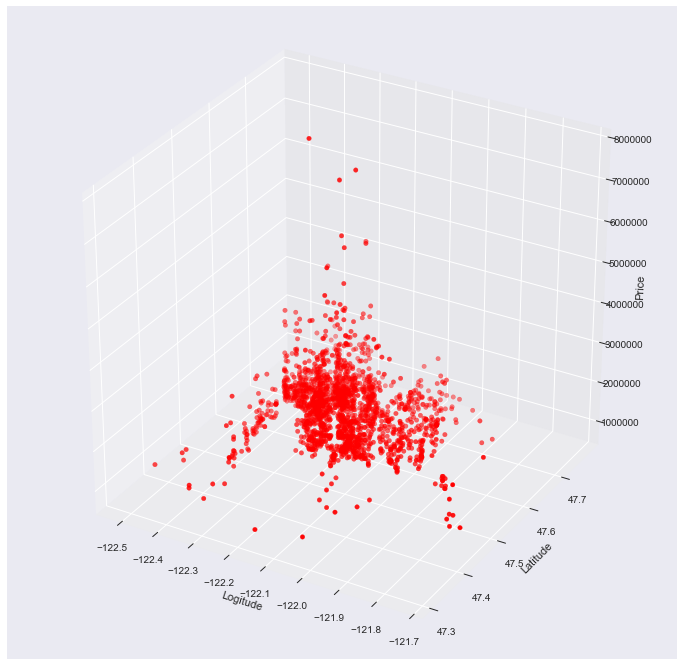

In [102]:
#  Creating a 3d Scatter plot of the most expensive properties based on longitude and latitude and price
#  we can see that the is a large cluster of properties in between -122.4 & -122.1 and between 47.5 and 47.7

from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize = (12,12))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(most_expensive_2000['long'],most_expensive_2000['lat'] , most_expensive_2000['price'], c='r', marker='o')

ax.set_xlabel('Logitude')
ax.set_ylabel('Latitude')
ax.set_zlabel('Price')

plt.savefig('3dPrice.png')

plt.show()

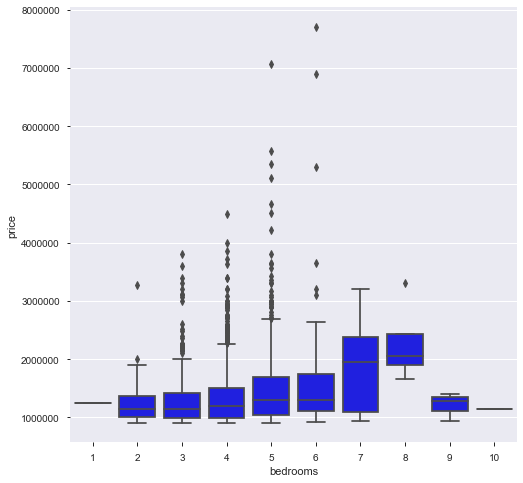

In [103]:
# The following box plots below show how the price change as the number of rooms increases

ax=plt.figure(figsize = (8,8))
ax= sns.boxplot(most_expensive_2000['bedrooms'], most_expensive_2000['price'], color = 'blue')


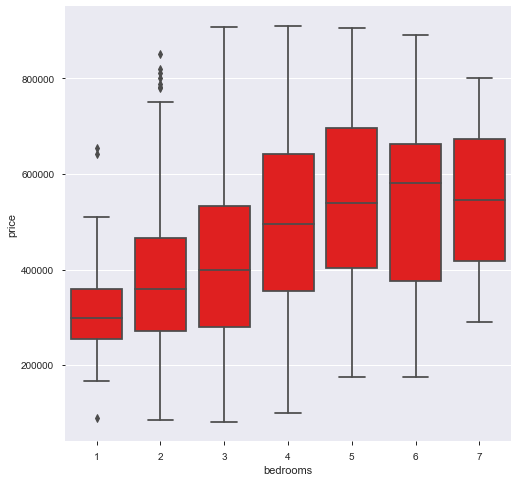

In [104]:
ax=plt.figure(figsize = (8,8))
ax= sns.boxplot(df_sample2000['bedrooms'], df_sample2000['price'], color= 'red')

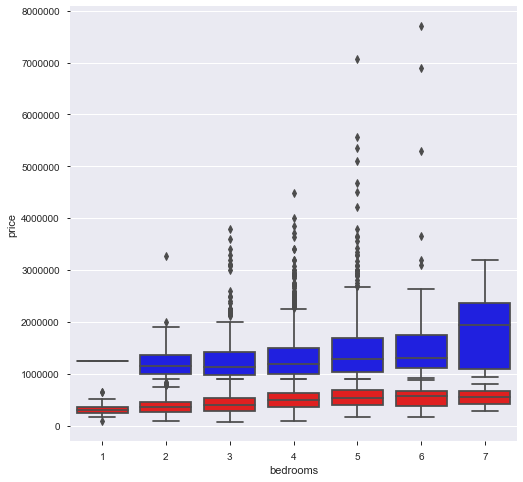

In [105]:
# When comparing the two previous boxplots we can see that while there is a slight over lap in prices the vast 
# majority of the most expensive properties are substantially more expensive based on the number of rooms

ax=plt.figure(figsize = (8,8))
ax= sns.boxplot(most_expensive_2000['bedrooms'], most_expensive_2000['price'], color = 'blue')
ax2= sns.boxplot(df_sample2000['bedrooms'], df_sample2000['price'], color= 'red')

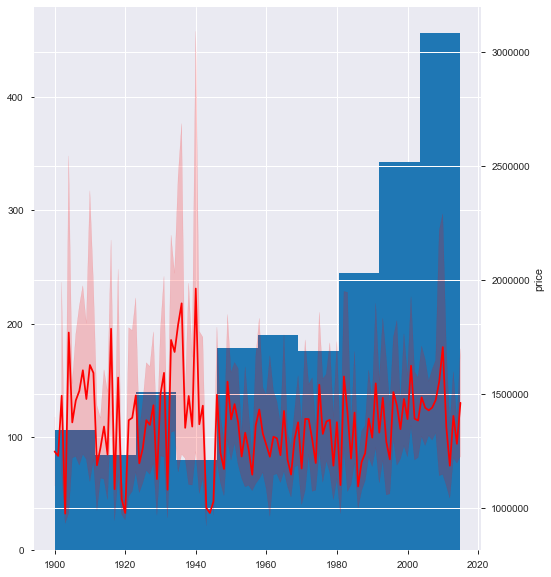

In [106]:
#Histogram of Year built properties with a line plot on Year built vs price shows a few of the 
#most expensive properties sold have been older properties, however there is no strong correlation between 
#Year Built and price

plt.figure(figsize = (8,10))
ax= plt.hist(most_expensive_2000['yr_built'], alpha = 1, label = 'Most Expensive')

ax3 = plt.twinx()
ax3= sns.lineplot(most_expensive_2000['yr_built'], most_expensive_2000['price'],color='red', alpha = 1 )

plt.savefig('YrBuiltPrice.png')

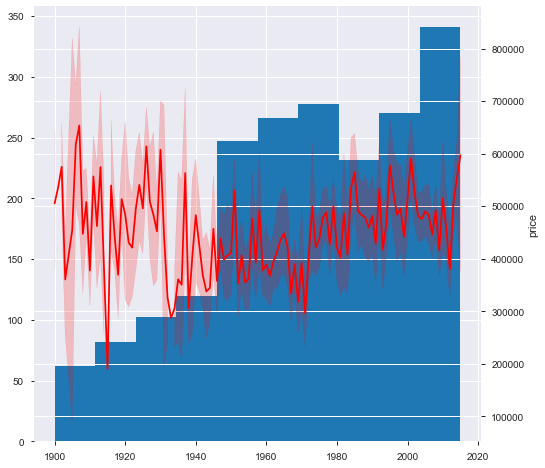

In [107]:
#As with the above graph some of the most expensive sample properties are the oldest, however there is no strong 
#correlation between year built and price.


plt.figure(figsize = (8,8))
ax= plt.hist(df_sample2000['yr_built'], alpha = 1, label = 'Sample')

ax3 = plt.twinx()
ax3= sns.lineplot(df_sample2000['yr_built'], df_sample2000['price'],color='red', alpha = 1) 

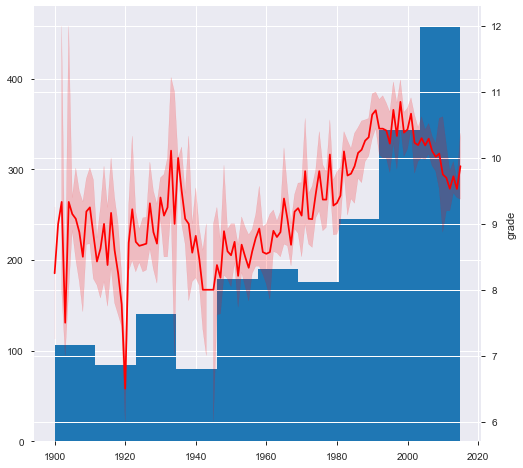

In [108]:
# This graph shows between 1940 and 2000, there is a positive linear correlation betweent year built and grade.
#Overall we assume that the drops in the grade are due to world events such as Great Depression and WW2

plt.figure(figsize = (8,8))
ax= plt.hist(most_expensive_2000['yr_built'], alpha = 1, label = 'Most Expensive')

ax3 = plt.twinx()
ax3= sns.lineplot(most_expensive_2000['yr_built'], most_expensive_2000['grade'],color='red', alpha = 1 )

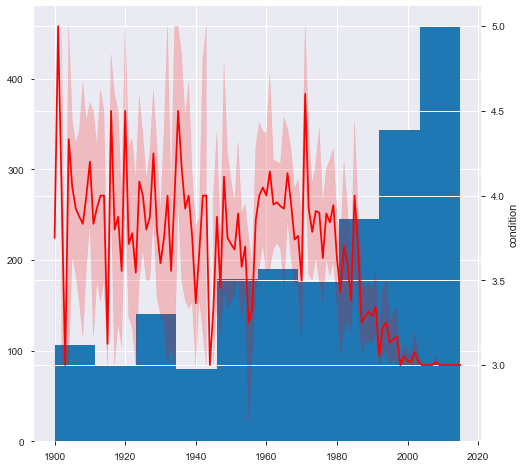

In [109]:
#Overall the condition of the properties are declining by year built

plt.figure(figsize = (8,8))
ax= plt.hist(most_expensive_2000['yr_built'], alpha = 1, label = 'Most Expensive')

ax3 = plt.twinx()
ax3= sns.lineplot(most_expensive_2000['yr_built'], most_expensive_2000['condition'],color='red', alpha = 1 )

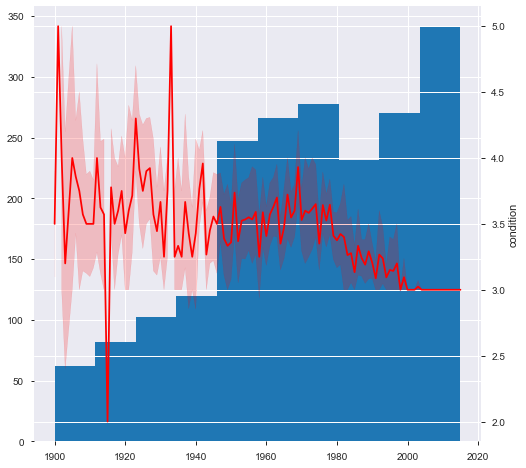

In [110]:
#Similar to the graph above the sample size properties conditon are declining by year built

plt.figure(figsize = (8,8))
ax= plt.hist(df_sample2000['yr_built'], alpha = 1, label = 'Sample')

ax3 = plt.twinx()
ax3= sns.lineplot(df_sample2000['yr_built'], df_sample2000['condition'],color='red', alpha = 1) 

# Model

Due to the fact that we had initially created a different model based on our questions, we decided to use our cleaned data set to nbuild the following models.  We know from our research that the following affect the price of the property:

- sqft_living
- bedrooms
- grade 
- waterfront
- basement

In [111]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [112]:
import numpy as np

In [113]:
# While we  initially knew that we would have to log our price and sqft_living we just wanted to see what would happen if we created
# a regression model based on price and sqft_living

price_sqftliving = 'price ~ sqft_living'
model = ols(price_sqftliving, data = df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.493
Model:                            OLS   Adj. R-squared:                  0.493
Method:                 Least Squares   F-statistic:                 2.097e+04
Date:                Wed, 23 Oct 2019   Prob (F-statistic):               0.00
Time:                        11:36:33   Log-Likelihood:            -3.0001e+05
No. Observations:               21593   AIC:                         6.000e+05
Df Residuals:                   21591   BIC:                         6.000e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept   -4.401e+04   4410.449     -9.979      0.000   -5.27e+04   -3.54e+04
sqft_living   280.8709      1.940    144.811      0.000     277.069     284.673
==============================================================================
Omnibus:                    14798.374   Durbin-Watson:                   1.982
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           542398.135
Skew:                           2.820   Prob(JB):                         0.00
Kurtosis:                      26.897   Cond. No.                     5.63e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.63e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [141]:
# checking our scatter matrix prior to logging our price and sqft_living
outcome = 'price'
x_cols = ['sqft_living', 'bedrooms' , 'yr_built' ,'grade', 'waterfront', 'basement']
predictors = '+'.join(x_cols)
formula = outcome + '~' + predictors
model = ols(formula=formula, data=df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.631
Model:                            OLS   Adj. R-squared:                  0.631
Method:                 Least Squares   F-statistic:                     6158.
Date:                Wed, 23 Oct 2019   Prob (F-statistic):               0.00
Time:                        14:31:07   Log-Likelihood:                -6020.8
No. Observations:               21593   AIC:                         1.206e+04
Df Residuals:                   21586   BIC:                         1.211e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      17.7014      0.165    107.371      0.000      17.378      18.025
sqft_living     0.4550      0.010     46.128      0.000       0.436       0.474
bedrooms       -0.0315      0.003     -9.833      0.000      -0.038      -0.025
yr_built       -0.0051   8.55e-05    -59.116      0.000      -0.005      -0.005
grade           0.2547      0.003     85.296      0.000       0.249       0.261
waterfront      0.5501      0.027     20.539      0.000       0.498       0.603
basement        0.0585      0.005     12.173      0.000       0.049       0.068
==============================================================================
Omnibus:                       54.115   Durbin-Watson:                   1.952
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               59.453
Skew:                          -0.085   Prob(JB):                     1.23e-13
Kurtosis:                       3.193   Cond. No.                     1.49e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.49e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

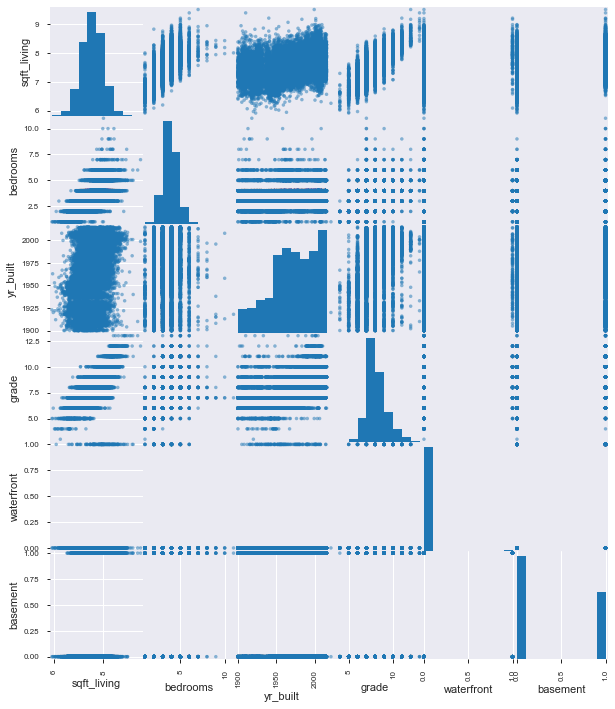

In [142]:
pd.plotting.scatter_matrix(df[x_cols], figsize=(10,12));

In [120]:
# creating a new dataframe for our logged variables

df_log = df

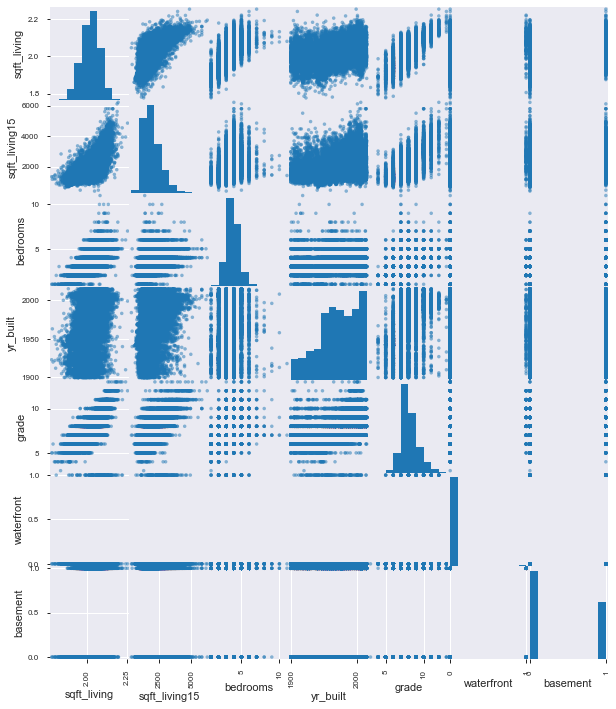

In [144]:
# creating the logs of price and Sqft_living
non_normal = ['price','sqft_living']
for feat in non_normal:
    df_log[feat] = df_log[feat].map(lambda x: np.log(x))
pd.plotting.scatter_matrix(df[x_cols], figsize=(10,12));

In [145]:
#univariate regressi based on sqft_living
living_price = 'price~sqft_living'
model = ols(living_price, data = df_log)
results = model.fit()
results.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.445
Model:                            OLS   Adj. R-squared:                  0.445
Method:                 Least Squares   F-statistic:                 1.730e+04
Date:                Wed, 23 Oct 2019   Prob (F-statistic):               0.00
Time:                        14:33:22   Log-Likelihood:                 45164.
No. Observations:               21593   AIC:                        -9.032e+04
Df Residuals:                   21591   BIC:                        -9.031e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       1.6106      0.007    221.205      0.000       1.596       1.625
sqft_living     0.4739      0.004    131.526      0.000       0.467       0.481
==============================================================================
Omnibus:                      102.676   Durbin-Watson:                   1.977
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               80.060
Skew:                           0.062   Prob(JB):                     4.12e-18
Kurtosis:                       2.729   Cond. No.                         90.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

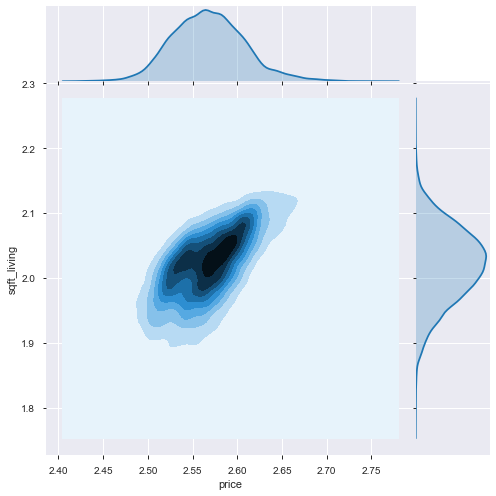

In [146]:

x1 = df_log.price
x2 = df_log.sqft_living

# Showing the joint distribution using kernel density estimation
g = sns.jointplot(x1, x2, kind="kde", height=7, space=0)

In [148]:
# another univariate regregression based on number of bedrooms
beds_price= 'price~bedrooms'
model = ols(living_price, data = df_log)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.445
Model:                            OLS   Adj. R-squared:                  0.445
Method:                 Least Squares   F-statistic:                 1.730e+04
Date:                Wed, 23 Oct 2019   Prob (F-statistic):               0.00
Time:                        14:35:56   Log-Likelihood:                 45164.
No. Observations:               21593   AIC:                        -9.032e+04
Df Residuals:                   21591   BIC:                        -9.031e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       1.6106      0.007    221.205      0.000       1.596       1.625
sqft_living     0.4739      0.004    131.526      0.000       0.467       0.481
==============================================================================
Omnibus:                      102.676   Durbin-Watson:                   1.977
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               80.060
Skew:                           0.062   Prob(JB):                     4.12e-18
Kurtosis:                       2.729   Cond. No.                         90.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [149]:
outcome = 'price'
x_cols = ['sqft_living' , 'bedrooms' ,'grade', 'waterfront', 'basement']
predictors = '+'.join(x_cols)
formula = outcome + '~' + predictors
model = ols(formula=formula, data=df_log).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.564
Model:                            OLS   Adj. R-squared:                  0.564
Method:                 Least Squares   F-statistic:                     5587.
Date:                Wed, 23 Oct 2019   Prob (F-statistic):               0.00
Time:                        14:36:02   Log-Likelihood:                 47775.
No. Observations:               21593   AIC:                        -9.554e+04
Df Residuals:                   21587   BIC:                        -9.549e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       2.0042      0.010    192.216      0.000       1.984       2.025
sqft_living     0.2185      0.006     36.185      0.000       0.207       0.230
bedrooms       -0.0017      0.000     -6.466      0.000      -0.002      -0.001
grade           0.0162      0.000     68.607      0.000       0.016       0.017
waterfront      0.0475      0.002     21.460      0.000       0.043       0.052
basement        0.0096      0.000     24.844      0.000       0.009       0.010
==============================================================================
Omnibus:                        6.652   Durbin-Watson:                   1.974
Prob(Omnibus):                  0.036   Jarque-Bera (JB):                6.640
Skew:                           0.037   Prob(JB):                       0.0361
Kurtosis:                       2.957   Cond. No.                         585.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

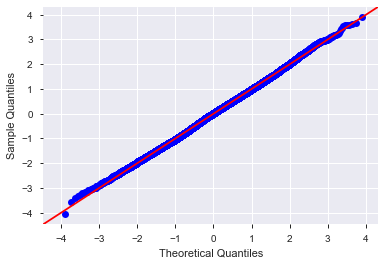

In [150]:
# checking our qq plot for normal distibution of our model

import scipy.stats as stats
residuals = model.resid
fig = sm.graphics.qqplot(residuals, dist=stats.norm, line='45', fit=True)

In [157]:
me2000_log_df = df_log[df_log.index.map(lambda x: x in index_list)]

In [158]:
me2000_log_df.head()

id       date     price  bedrooms  bathrooms  sqft_living  \
5   7237550310  5/12/2014  2.640665         4       4.50     2.151512   
21  2524049179  8/26/2014  2.674746         3       2.75     2.082300   
26  1794500383  6/26/2014  2.621071         3       1.75     2.054616   
49   822039084  3/11/2015  2.647282         3       2.50     2.069448   
54  4217401195   3/3/2015  2.619738         5       2.25     2.068388   

    sqft_lot  floors  waterfront  condition  ...  zipcode      lat     long  \
5     101930     1.0         0.0          3  ...    98053  47.6561 -122.005   
21     44867     1.0         0.0          3  ...    98040  47.5316 -122.233   
26      2691     2.0         0.0          3  ...    98119  47.6386 -122.360   
49     65005     1.0         1.0          5  ...    98070  47.4041 -122.451   
54      6000     1.5         0.0          3  ...    98105  47.6571 -122.281   

    sqft_living15  sqft_lot15                     geometry  sqft_basement2  \
5            4760      101930  POINT (-122.00500 47.65610)            1530   
21           4110       20336  POINT (-122.23300 47.53160)             720   
26           1760        3573  POINT (-122.36000 47.63860)             700   
49           2680       72513  POINT (-122.45100 47.40410)             588   
54           2730        6000  POINT (-122.28100 47.65710)             600   

    basement_bool  basement living_std  
5            True         1  -9.201433  
21           True         1  -9.776387  
26           True         1  -9.995441  
49           True         1  -9.878837  
54           True         1  -9.887227  

[5 rows x 24 columns]

In [162]:
# when building the regression model on our most expensive properties there is a relatively large drop in r-squared
# this is clearly something that we need to look into as one would have thought there would be a highre rate of 
# correlation.

outcome = 'price'
x_cols = ['sqft_living' , 'bedrooms' ,'grade', 'waterfront', 'basement']
predictors = '+'.join(x_cols)
formula = outcome + '~' + predictors
model = ols(formula=formula, data=me2000_log_df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.367
Model:                            OLS   Adj. R-squared:                  0.365
Method:                 Least Squares   F-statistic:                     231.2
Date:                Wed, 23 Oct 2019   Prob (F-statistic):          5.05e-195
Time:                        14:46:33   Log-Likelihood:                 5185.0
No. Observations:                2000   AIC:                        -1.036e+04
Df Residuals:                    1994   BIC:                        -1.032e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       2.2226      0.032     70.019      0.000       2.160       2.285
sqft_living     0.1746      0.017     10.221      0.000       0.141       0.208
bedrooms        0.0006      0.001      1.121      0.263      -0.000       0.002
grade           0.0050      0.000     10.323      0.000       0.004       0.006
waterfront      0.0287      0.002     15.703      0.000       0.025       0.032
basement        0.0065      0.001      7.579      0.000       0.005       0.008
==============================================================================
Omnibus:                      117.798   Durbin-Watson:                   2.020
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              137.757
Skew:                           0.634   Prob(JB):                     1.22e-30
Kurtosis:                       3.211   Cond. No.                         952.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""